# Introducción a la visualización de data con matplotlib

## Nota

- La [base de datos](https://github.com/adinamarca/adinamarca.github.io/blob/master/bbddnumeralab-covid19.csv) utilizada proviene de Numeral.lab, por lo que los ejercicios varían en torno a Datacamp (aunque poseen el mismo enfoque).

- Los tiempos de ejecución de las primeras celdas es sumamente lento, dado que el índice se trabajó como cadenas de strings en vez de series de tiempo, de forma que Matplotlib no las reconoció como tal.

- El punto anterior fue solucionado en (1fix), pasando desde minutos de ejecución del script a segundos.

<img src="1.jpg">

## Visualización de data

En este curso de Datacamp, veremos cómo realizar visualización de data con la librería matplotlib.

Una de las ventajas de matplotlib es que permite tener un control completo sobre las propiedades de un gráfico.

## Introduciéndonos a la interfaz de pyplot

Al final de este curso no solo sabremos cómo controlar las visualizaciones, sino también cómo crear programas que creen automáticamente visualizaciones basadas en nuestros datos.

Hay muchas formas de usar matplotlib, aunque, en este curso, utilizaremos la interfaz principal orientada a objetos. Este interfaz se proporciona a través del submódulo pyplot. A continuación, importaremos este submódulo y lo llamaremos plt (convención).

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython as IPython

Cuando el comando plt.subplots() se llama sin ninguna entrada, crea dos objetos diferentes:

- Una figura.

El objeto figura es un contenedor que contiene todo lo que se ve en el plot.

- Un objeto de ejes

Mientras tanto, los ejes son parte del plot que contiene los datos. Es el lienzo en el que dibujaremos con nuestros datos, para visualizarlo.


<function matplotlib.pyplot.show(close=None, block=None)>

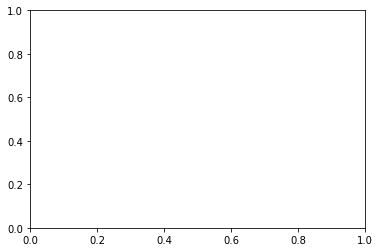

In [2]:
fig, ax = plt.subplots()
plt.show

Arriba, se puede ver una figura con ejes vacíos, dado que todavía no se han agregado datos a la figura.

Agreguemos algunos datos.

In [3]:
# Leemos la base de datos en formato CSV con pandas (mala práctica al no leer la fecha como datetime)
numeralab = pd.read_csv('bbddnumeralab-covid19.csv')

# (1fix)
numeralab = pd.read_csv('bbddnumeralab-covid19.csv', parse_dates=['Fecha'], index_col='Fecha')

# Últimas 5 filas
numeralab.tail() 

Día  Casos Nuevos  Casos Nuevos Sin Síntomas  \
Fecha                                                        
2021-02-06  321.0         133.0                       44.0   
2021-02-07  322.0         108.0                       43.0   
2021-02-08  323.0         133.0                       60.0   
2021-02-09  324.0         114.0                       43.0   
2021-02-10  325.0         100.0                       21.0   

            Casos Nuevos Con Síntomas  Casos Nuevos Sin Notificar  \
Fecha                                                               
2021-02-06                       86.0                         3.0   
2021-02-07                       64.0                         1.0   
2021-02-08                       69.0                         4.0   
2021-02-09                       64.0                         7.0   
2021-02-10                       77.0                         2.0   

            Recuperados Nuevos  Activos  Activos Probables  Fallecidos Nuevos  \
Fecha                                                                           
2021-02-06               203.0    919.0              278.0                4.0   
2021-02-07               160.0    864.0              246.0                4.0   
2021-02-08               150.0    845.0              216.0                3.0   
2021-02-09               130.0    829.0              195.0                0.0   
2021-02-10               134.0    794.0              204.0                0.0   

            PCR Nuevos  ...  VMI Totales  RE Regional  RE Iquique  \
Fecha                   ...                                         
2021-02-06      1710.0  ...          NaN          1.0        0.97   
2021-02-07      1260.0  ...          NaN          NaN         NaN   
2021-02-08      1757.0  ...          NaN          NaN         NaN   
2021-02-09      1374.0  ...          NaN          NaN         NaN   
2021-02-10       472.0  ...          NaN          NaN         NaN   

            RE Tamarugal  Var. Casos Nuevos (%)  Var. Recuperados (%)  \
Fecha                                                                   
2021-02-06          1.24                  11.76                130.68   
2021-02-07           NaN                 -18.80                -21.18   
2021-02-08           NaN                  23.15                 -6.25   
2021-02-09           NaN                 -14.29                -13.33   
2021-02-10           NaN                 -12.28                  3.08   

            Var. Fallecidos Nuevos (%)  Var. Activos Nuevos (%)  \
Fecha                                                             
2021-02-06                       300.0                    -7.45   
2021-02-07                         0.0                    -5.98   
2021-02-08                       -25.0                    -2.20   
2021-02-09                      -100.0                    -1.89   
2021-02-10                         0.0                    -4.22   

            Var. PCR Nuevos (%)  Var. R. Usuarios Nuevos (%)  
Fecha                                                         
2021-02-06                34.96                         4.89  
2021-02-07               -26.32                         9.33  
2021-02-08                39.44                         8.73  
2021-02-09               -21.80                        -7.63  
2021-02-10               -65.65                        -4.99  

[5 rows x 39 columns]

## Agregando datos a los ejes

Para agregar datos a los ejes, llamamos al comando de trazado. Los comandos de trazado son métodos del objeto axes 'ax'.

Utilizaremos la base de datos COVID-19 recopilada por numeral.lab desde el Ministerio de Ciencia de Chile.

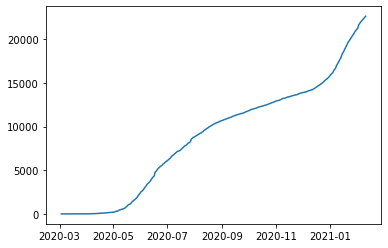

In [4]:
fig, ax = plt.subplots()
ax.plot(numeralab.index, numeralab['Casos Acumulados'])
plt.show()

Notar como el primer argumento del método plot son las fechas, mientras el segundo argumento son los casos acumulados de COVID-19 en Tarapacá.
Finalmente, llamamos a la función plt.show() para mostrar el efecto del comando del trazado. Ésto agrega una 'línea' al gráfico.

- La dimensión horizontal del gráfico representa la fecha.
- La dimensión vertical representan los casos acumulados de COVID-19 en la zona.

Las tendencias quedan fácilmente visibles gracias al gráfico.

## Agregando más datos a los ejes y colocando todo en uno

Además, y si lo deseamos, podemos agregar más datos al gráfico. Por ejemplo. también tenemos los 'recuperados acumulados' en la misma base de datos, ¿por qué no la utilizamos?

Agregamos estos datos a los ejes llamado nuevamente al método plot

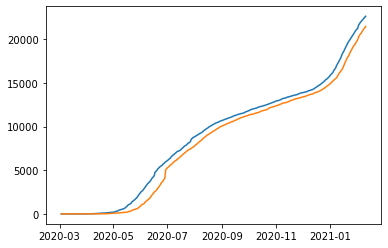

In [5]:
fig, ax = plt.subplots()
ax.plot(numeralab.index, numeralab['Casos Acumulados'])
ax.plot(numeralab.index, numeralab['Recuperados Acumulados'])
plt.show()

Así es como se vería todo el código para crear esta figura.

1) Creamos los objetos figura y ejes.
2) Llamamos al método plot de axes 'ax' para agregar, en primera instancia, los casos acumulados y posteriormente los recuperados acumulados de COVID-19 en la zona.
3) Finalmente, le pedimos a matplotlib que nos muestre la figura con el método show.

En los siguientes ejercicios, practicaremos cómo hacer una figura y sus ejes, agregándole datos.

### 1° EX: usando la interfaz de matplotlib.pyplot

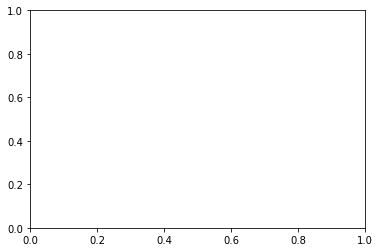

In [6]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Call the show function to show the result
plt.show()

### 2° EX: añadiendo data a los ejes del objeto 

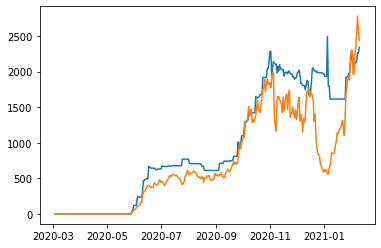

In [7]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot 
ax.plot(numeralab.index, numeralab["Residencias Cupos Totales"])

# Plot 
ax.plot(numeralab.index, numeralab["Residencias Usuarios"])

# Call the show function
plt.show()

Arriba, falta la leyenda (para saber qué color representa cada uno de los datos); sin embargo, el naranjo representa los usuarios en residencias sanitarias y los azules, los cupos de residencias sanitarias, ésto es fácilmente distinguible porque el trazado azul tiende a ser constante en algunos tramos, dado que se mantienen los cupos para residencias sanitarias en ciertos períodos de tiempo.

En ese sentido, podemos apreciar que, en los últimos datos del gráfico colapsaron las residencias sanitarias (mayor número de usuarios que de cupos).

A continuación, aprenderemos cómo colocar nombres a nuestros ejes (label o etiquetas en español).

## Customizando nuestros gráficos

Ahora que sabemos cómo agregar datos a un gráfico, comenzaremos a personalizar los gráficos.

## Customizando apariencia de la data

Primero, personalicemos la apariencia de los datos en el trazado.


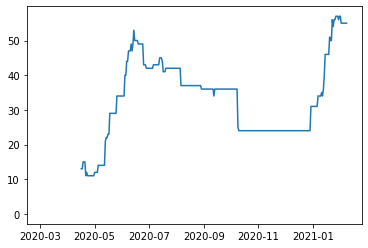

In [8]:
fig, ax = plt.subplots()
ax.plot(numeralab.index,
        numeralab['UCI Habilitadas'])
plt.show()


Arriba, tenemos el código que utilizamos anteriormente para trazar los datos sobre el COVID-19 en Tarapacá, Chile.

## Seleccionando marcadores

Una de las cosas que podríamos desear mejorar sobre este gráfico es que los datos <b>parecen ser continuos, pero en realidad, solo se midieron en ciertos intervalos.</b>.

Una forma de indicar ésto sería agregando marcadores que nos muestren dónde los datos existen y qué partes son solo líneas que se conectan entre los puntos de datos.

El método de trazado, 'plot', toma un argumento de palabra clave opcional, 'marker', que nos permite indicar que estamos interesados en agregar marcadores al trazado y también qué tipo de marcadores deseamos.

Por ejemplo, pasar la letra minúscula "o" indica que nos gustaría usar círculos como marcadores. 

Si, en vez de pasar "o", pasáramos "v", obtendríamos marcadores con forma de triángulos apuntando hacia abajo.

Para ver todos los estilos posibles de marcadores, podríamos visitar [esta página](https://matplotlib.org/api/markers_api.html) en la documentación en línea de Matplotlib.

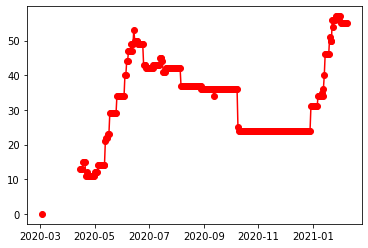

In [9]:
fig, ax = plt.subplots()
ax.plot(numeralab.index,
        numeralab['UCI Habilitadas'],
        marker="o",
        c='red')
plt.show()

En el gráfico, los datos medidos aparecen cono marcadores de una determinada forma, y se hace más evidente que las líneas solo están conectadas entre ellas.

## Customizando el tipo de línea

Podríamos ir aún más lejos para enfatizar ésto, cambiando la apariencia de estas líneas de conexión. Ésto se realiza agregando el argumento 'linestyle'. Aquí, se usan dos guiones para indicar que la línea debe ser discontinua (dash en inglés).

Al igual que las formas de marcador, hay estilos de línea entre los que se pueden elegir enumerados en la [siguiente documentación](https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html).

## Eliminando líneas con linestyle

Incluso, podríamos eliminar el trazado de la línea, al pasar a la cadena de texto 'None' como entrada en el argumento.

## Finalmente, podríamos elegir qué color nos gustaría usar para los datos.

Por ejemplo, aquí hemos elegido 'b' para mostrar estos datos en azul, por la letra 'b' de 'blue'.

## Customizando las etiquetas de los ejes

Otra cosa importante para personalizar son las etiquetas de los ejes. Si deseamos que las visualizaciones se comuniquen correctamente, siempre debemos etiquetar los ejes.

Además del método de trazado, el objeto 'ax' de 'axes' tiene varios métodos que comienzan con el método '.set'; estos son métodos que se pueden usar para cambiar ciertas propiedades del objeto, antes de llamar a 'show' para mostrarlo.

Por ejemplo, hay un método llamado 'ax.set_xlabel' que se puede usar para establecer el valor de la etiqueta del eje X. Tengamos en cuenta que, capitalizamos las etiquetas de los ejes, y las siguientes solo si son nombres propios, por convención.

Del mismo modo, está el método 'ax.set_ylabel', que personaliza el eje vertical.

Si luego, llamamos a 'plt.show()', veremos que los ejes tiene etiqueta.

## Añadiendo un título

Finalmente, también podemos agregar un título a los ejes utilizando el método 'ax.set_title'. Esto agrega otra fuente de información sobre los datos para proporcionar contexto para su visualización.

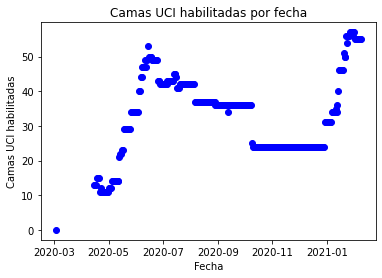

In [10]:
"""fig, ax = plt.subplots()
ax.plot(numeralab['Fecha'],
        numeralab['UCI Habilitadas'],
        marker="o",
        c='red',
        linestyle='--')
plt.show()"""

fig, ax = plt.subplots()
ax.plot(numeralab.index,
        numeralab['UCI Habilitadas'],
        marker="o",
        c='b',
        linestyle='None')
ax.set_xlabel('Fecha')
ax.set_ylabel('Camas UCI habilitadas')
ax.set_title('Camas UCI habilitadas por fecha')
plt.show()


Ahora que hemos visto algunos ejemplos de personalización de gráficos, ¡a ejercitar!

### 3° EX: Customizando la apariencia de los gráficos y la información



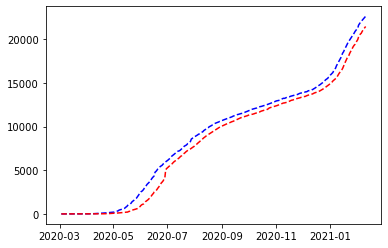

In [11]:
fig, ax = plt.subplots()

# Plot Seattle data, setting data appearance
ax.plot(numeralab.index, numeralab["Casos Acumulados"], c='b', linestyle='--')

# Plot Austin data, setting data appearance
ax.plot(numeralab.index, numeralab["Recuperados Acumulados"], c='r', linestyle='--')

# Call show to display the resulting plot
plt.show()

### 4° EX: Customizando los ejes y añadiendo título

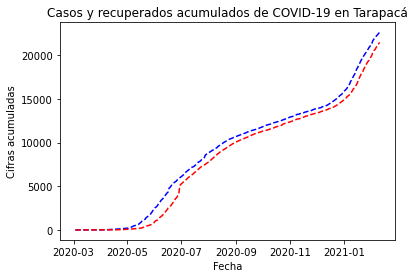

In [12]:
fig, ax = plt.subplots()

# Plot Seattle data, setting data appearance
ax.plot(numeralab.index, numeralab["Casos Acumulados"], c='b', linestyle='--')

# Plot Austin data, setting data appearance
ax.plot(numeralab.index, numeralab["Recuperados Acumulados"], c='r', linestyle='--')

# Customize the x-axis label
ax.set_xlabel('Fecha')

# Customize the y-axis label
ax.set_ylabel('Cifras acumuladas')

# Add the title
ax.set_title('Casos y recuperados acumulados de COVID-19 en Tarapacá')

# Call show to display the resulting plot
plt.show()

## Small multiples

En algunos casos, agregar más datos a un gráfico puede hacer que esté demasiado ocupado o sobrecargado, oscureciendo los patrones en lugar de revelarlos.

Por ejemplo, exploremos los datos que tenemos sobre el COVID-19 en Tarapacá.

A continuación, graficaremos varias cifras del COVID-19 en Tarapacá.


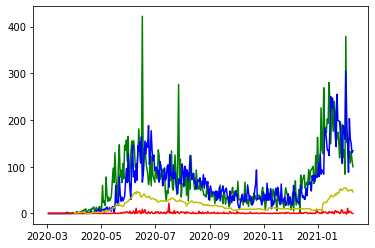

In [13]:
fig, ax = plt.subplots()

ax.plot(numeralab.index, numeralab["Casos Nuevos"],  c='g')

ax.plot(numeralab.index, numeralab["Recuperados Nuevos"],  c='b')

ax.plot(numeralab.index, numeralab["Fallecidos Nuevos"],  c='r')

ax.plot(numeralab.index, numeralab["UCI COVID-19"],  c='y')

plt.show()

## Demasiados datos

Al mostrar el gráfico, es un poco desordenado. Hay demasiados datos en este gráfico.

Una forma de superar este tipo de desorden es usando lo que se llaman "pequeños múltiplos".

Estas son múltiples parcelas pequeñas que muestran datos similares en diferentes condiciones.

Por ejemplo, datos de precipitación en diferentes ciudades.

## Small multiples con plt.subplots

En matplotlib, los <b color="red">los múltiplos pequeños se llaman subtramas o subgráficos</b> (subplot en inglés).

Esa es, también la razón por la cual la función que crea el objeto para graficar, se llama subtrama, subgráfico o subplots.

Anteriormente, llamamos a esta función sin entradas (sin argumentos). Esto crea solo una subtrama o subgráfico (un solo gráfico).

Ahora, le daremos algunas entradas, de forma que:

$ fig, ax = plt.subplots(3, 2) $

Los múltiplos pequeños o subgráficos, generalmente se organizan en la página como una cuadrícula con filas y columnas.

A continuación, crearemos un objeto 'figura' con tres filas de subtramas y dos columnas.

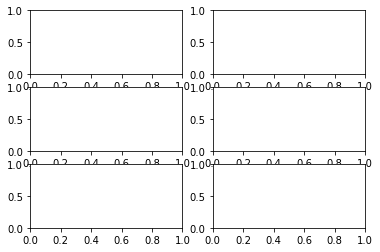

Los subplots creados tienen una dimensión de 3 filas y 2 columnas.


In [14]:
# Juega cambiando la cantidad de filas y columnas
fig, ax = plt.subplots(3, 2)

# Mostramos el gráfico
plt.show()

# Para saber la dimensión de la matriz de subplots
print('Los subplots creados tienen una dimensión de {} filas y {} columnas.'.format(ax.shape[0], ax.shape[1]))

Así es como se vería antes de agregarle datos.

En este caso, la variable 'ax' ya no es solo un objeto 'ejes', en cambio, es una matriz de objetos 'ax' con una forma de 3 por 2.

## Agregando data a los subgráficos

Ahora, para agregar datos, tendríamos que indexar este objeto y llamar al método de trazado (gráfico) en un elemento de la matriz.

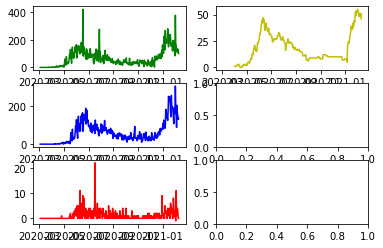

In [15]:
# Juega cambiando la cantidad de filas y columnas
fig, ax = plt.subplots(3, 2)

# Añadimos la data a los gráficos antes de pedirle a matplotlib que muestre las parcelas
ax[0, 0].plot(numeralab.index, numeralab["Casos Nuevos"],  c='g')

ax[1, 0].plot(numeralab.index, numeralab["Recuperados Nuevos"],  c='b')

ax[2, 0].plot(numeralab.index, numeralab["Fallecidos Nuevos"],  c='r')

ax[0, 1].plot(numeralab.index, numeralab["UCI COVID-19"],  c='y')

"""
Notar como el tiempo de ejecución se cuadriplicó dado que ahora, estamos creando cuatro figuras dentro de cuatro ejes distintos (al menos, fue el performance de Jupyter en VSCODE).

CORREGIDO EN (1fix).

"""

# Mostramos el gráfico
plt.show()

## Subplots with data

Hay un caso especial para situaciones en las que solo tenemos una fila o solo una columna de parcelas. En este caso, la matriz resultante será unidimensional, y nosotros solo tendremos que proporcionar un índice para acceder a los elementos de la matriz.

Por ejemplo, consideremos lo que podríamos hacer con los datos con los que anteriormente estábamos trabajando.

Creamos una figura, y una matriz de objetos 'ax' con dos filas y una columna.

Abordamos el primer elemento de esta matriz, que es la subtrama superior, y agregamos los datos a esta gráfica.

Luego, abordaremos el segundo elemento en la matriz, que es el diagrama inferior, y le agregaremos los datos.

Debido a que están uno encima del otro, solo agregamos una etiqueta de eje X a el diagrama inferior, dado que abordaremos solo el segundo elemento en la matriz de los objetos axes ('ax').

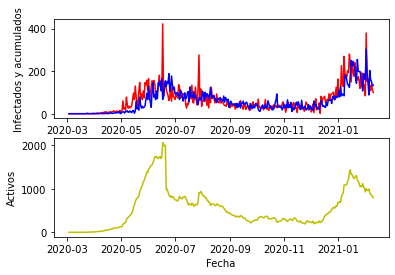

In [16]:
fig, ax = plt.subplots(2, 1)

# Añadimos la data a los gráficos antes de pedirle a matplotlib que muestre las parcelas
ax[0].plot(numeralab.index, numeralab["Casos Nuevos"],  c='r')

ax[0].plot(numeralab.index, numeralab["Recuperados Nuevos"],  c='b')

ax[1].plot(numeralab.index, numeralab["Activos"],  c='y')

# Añadimos las etiquetas de los ejes
ax[0].set_ylabel('Infectados y acumulados')
ax[1].set_ylabel('Activos')
ax[1].set_xlabel('Fecha')

# Mostramos los gráficos
plt.show()

Al mostrar el gráfico, vemos que está todo más ordenado, presentando los datos limpiamente.

## Compartiendo el rango del eje Y

Una cosa que aún debemos tener en cuenta es el rango del eje Y en los dos gráficos, que no es exactamente el mismo: <b color="red">ésto se debe a que los valores más altos y más bajos en los dos conjuntos de datos no son idénticos</b>. Por ello, y en caso de comparar ambos gráficos a simple vista, pareciera que ha habido un número similar de activos que de infectados y recuperados, cuando no es así.

Para ello, debemos asegurarnos de que todas las subtramas compartan el mismo rango de valores del eje Y, por lo que debemos inicializar la figura y sus subtramas con el argumento 'sharey' establecido en True, tal como se muestra a continuación.

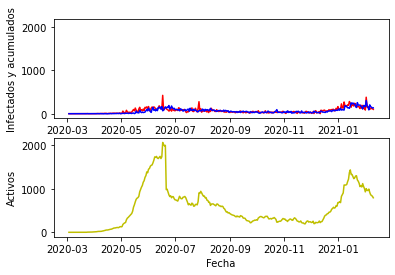

In [17]:
fig, ax = plt.subplots(2, 1, sharey=True)

# Añadimos la data a los gráficos antes de pedirle a matplotlib que muestre las parcelas
ax[0].plot(numeralab.index, numeralab["Casos Nuevos"],  c='r')

ax[0].plot(numeralab.index, numeralab["Recuperados Nuevos"],  c='b')

ax[1].plot(numeralab.index, numeralab["Activos"],  c='y')

# Añadimos las etiquetas de los ejes
ax[0].set_ylabel('Infectados y acumulados')
ax[1].set_ylabel('Activos')
ax[1].set_xlabel('Fecha')

# Mostramos los gráficos
plt.show()

Tal como se puede apreciar, ésto significa que ambas subtramas tendrán el mismo rango de valores del eje Y, en función de los datos de ambos conjuntos. 

Ahora, la comparación entre ambos conjuntos de datos es factible a simple vista.

A continuación, practicaremos creando visualizaciones con pequeños múltiplos.

### 5° EX: Pregunta de alternativa.

¿Cómo crearías una figura con 6 ejes organizados en 3 filas y 2 columnas?

$ fig, ax = plt.subplots(3, 2) $

Cuidar no confundir la indexación de Python (desde el 0), con la indexación de matplotlib al crear las parcelas de m x n ($ plt.subplots(m, n) $).


### 6° EX: Creating small multiples with plt.subplots.


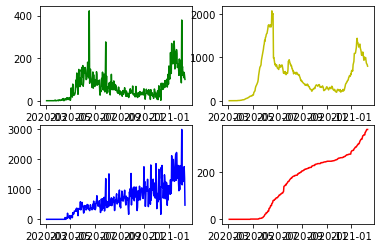

In [18]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot
ax[0, 0].plot(numeralab.index, numeralab['Casos Nuevos'], c='g')

# In the top right (index 0,1), plot
ax[1, 0].plot(numeralab.index, numeralab['PCR Nuevos'], c='b')

# In the bottom left (1, 0) plot
ax[0, 1].plot(numeralab.index, numeralab['Activos'], c='y')

# In the bottom right (1, 1) plot
ax[1, 1].plot(numeralab.index, numeralab['Fallecidos Acumulados'], c='r')

# Show
plt.show()

### 7° EX: Small multiples with shared y axis

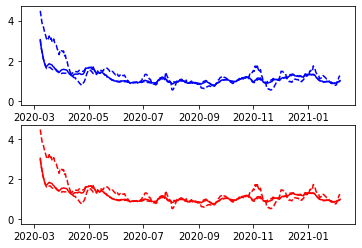

In [19]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot RE data in the top axes
ax[0].plot(numeralab.index, numeralab['RE Regional'], color = 'b')
ax[0].plot(numeralab.index, numeralab['RE Iquique'], color = 'b', linestyle = '--')
ax[0].plot(numeralab.index, numeralab['RE Tamarugal'], color = 'b', linestyle = '--')

# Plot RE data in the bottom axes
ax[1].plot(numeralab.index, numeralab['RE Regional'], color = 'r')
ax[1].plot(numeralab.index, numeralab['RE Iquique'], color = 'r', linestyle = '--')
ax[1].plot(numeralab.index, numeralab['RE Tamarugal'], color = 'r', linestyle = '--')

plt.show()

## Graficando series de tiempo

Muchos tipos de datos están organizados como series temporales y las visualizaciones de series temporales son una herramienta excelente para detectar patrones en los datos.

## Time-series data

Por ejemplo, el conjunto de datos que utilizamos, en el 7° EX, es un ejemplo de datos de series temporales.

Las variables continuas, como la precipitación, temperaturas, entre otros, organizados en tablas de datos de acuerco con una variable de tiempo, son series temporales. 

En este capítulo, profundizaremos en el uso de matplotlib para visualizar datos de series temporales. 

Como sabemos, nuestra base de datos que nos encontramos utilizando, se encuentra en formato CSV, con numerosas columnas.

Si queremos que Pandas reconozca que esta base de datos es una serie temporal, necesitaremos decirle que analice la columna 'Fecha' como fecha. 

Para utilizar todo el poder de las instalaciones de indexación de Pandas, también designaremos la columna 'Fecha' como nuestro índice utilizando el argumento de palabra clave 'index_col'.

## DateTimeIndex

El índice de nuestra base de datos, hasta ahora, es numérico, por lo que deberemos modificarlo.

## Rendimiento

<b color="red">Se puede apreciar una mejora en el rendimiento de Matplotlib</b>, utilizando índices como objeto datetime, en vez de utilizar una columna con formato de 'str'. Ésto se aprecia en los tiempos en los cuales los gráficos son visualizados, especialmente, comparando a partir de las siguientes celdas vs/ las celdas anteriores (de hecho, el formato datetime, matplotlib lo reconoce y lo ajusta mejor en el etiquetado).

In [20]:
# Deberemos asignar el índice a la columna 'Fecha' y convertirlo a datetime
# numeralab.index = pd.to_datetime(numeralab['Fecha'])

# Comprobamos el cambio
# numeralab.index

De esta forma, vemos que la conversión nos genera un objeto DateTimeIndex con 345 entradas, con cada día registrado desde el 3 de marzo de 2020.

Tiene un tipo de datos 'DateTime' y Matplotlib reconocerá <b>que esta es una variable que representa el tiempo</b>. Esto será importante en un momento.

El resto de las columnas en los datos se almacenan como columnas regulares de un DataFrame, con un tipo de datos de punto flotante, que nos permitirá calcular sobre ellos como variables continuas.

In [21]:
# Vemos las columnas de numeralab
print(numeralab.dtypes)

# Eliminamos la columna Fecha dado que ya está en el índice
# del numeralab['Fecha']

# Imprimimos los tipos de datos de las columnas
numeralab.info()

Día                            float64
Casos Nuevos                   float64
Casos Nuevos Sin Síntomas      float64
Casos Nuevos Con Síntomas      float64
Casos Nuevos Sin Notificar     float64
Recuperados Nuevos             float64
Activos                        float64
Activos Probables              float64
Fallecidos Nuevos              float64
PCR Nuevos                     float64
Casos Acumulados               float64
Recuperados Acumulados         float64
Fallecidos Acumulados          float64
PCR Acumulados                 float64
Tasa de Crecimiento            float64
M.E por 100.000 habitantes     float64
Tasa de Positividad (%)        float64
Residencias Cupos Totales      float64
Residencias Usuarios           float64
Residencias Totales            float64
UCI COVID-19                   float64
UCI Habilitadas                float64
UCI Ocupadas no COVID-19       float64
UCI Ocupadas                   float64
UTI Ocupadas                   float64
UTI Totales              

Como se puede apreciar, hay algunos datos que se almacenan como NaN o 'Not a Number'. Estos son valores faltantes donde no se tomaron medidas.

## Plotting time-series data

Para comenzar a trazar los datos, importamos matplotlib y creamos:

- Una figura.
- Ejes.

A continuación, agregamos los datos a la gráfica, de forma de agregar el índice de nuestro DataFrame para el eje X (fecha) y la columna para el eje y (casos acumulados). También, etiquetamos los ejes X e Y.

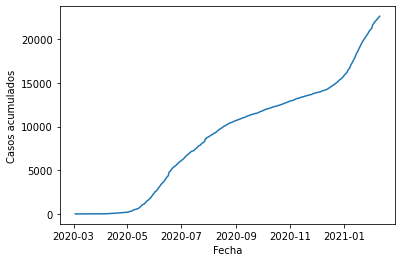

In [22]:
# Creamos los objetos de figura y ejes
fig, ax = plt.subplots()

# Graficamos los datos
ax.plot(numeralab.index, numeralab['Casos Acumulados'])

# Definimos etiquetas a los ejes
ax.set_xlabel('Fecha')
ax.set_ylabel('Casos acumulados')

# Mostramos el gráfico
plt.show()

En este gráfico, matplotlib elige automáticamente mostrar el tiempo en el eje X en meses, es decir, en intervalos de mes a mes.

La visualización de datos cuenta una historia clara: hay algunos meses en los que los contagios por COVID-19 en Tarapacá fueron exponenciales, y otros, en los que se tendió a estabilizar.

## Haciendo zoom a determinados meses

Podemos seleccionar un mes de los datos dividéndonos en el DataFrame por dos, de forma de delimitar el inicio y la fecha de finalización del período que nos interesa.

Al hacer lo del párrafo anterior, obtenemos un gráfico de una parte de la serie temporal que abarca un determinado mes del año.

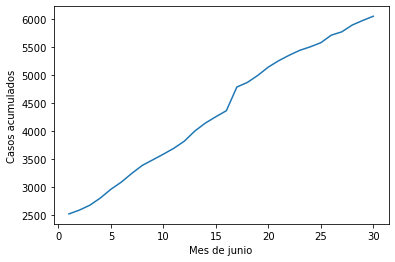

In [23]:
# Seleccionamos los contagios de junio
contagios_junio = numeralab[numeralab.index.month.isin([6])]

# Definimos los objetos figura y ejes
fig, ax = plt.subplots()

# Graficamos el día y los casos acumulados
ax.plot(contagios_junio.index.day, contagios_junio['Casos Acumulados'])

# Definimos etiquetas
ax.set_xlabel('Mes de junio')
ax.set_ylabel('Casos acumulados')

# Mostramos el gráfico
plt.show()


En caso de haber tenido valores faltantes, Matplotlib no hubiera graficado esas coordenadas, resultando en saltos de línea (similar a una función por tramos).

Antes de continuar, practiquemos la indexación y el trazado de datos de series temporales.

Recomendamos el siguiente vínculo de Datacamp, un [cheat sheet de Matplotlib](https://datacamp-community-prod.s3.amazonaws.com/28b8210c-60cc-4f13-b0b4-5b4f2ad4790b).

### 8° EX: Read data with a time index

Lo siguiente es un método más simple de seleccionar la fecha como índice como objeto 'DateTimeIndex' (a través de las variables 'parse_dates' y 'index_col').

In [24]:
# Read the data from file using read_csv
numeralab = pd.read_csv('bbddnumeralab-covid19.csv', parse_dates=['Fecha'], index_col='Fecha')

### 9° EX: Plot time-series data

Básicamente lo mismo que llevamos haciendo.

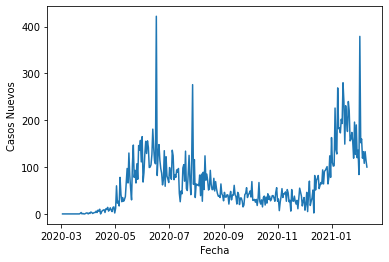

In [25]:
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(numeralab.index, numeralab['Casos Nuevos'])

# Set the x-axis label
ax.set_xlabel('Fecha')

# Set the y-axis label
ax.set_ylabel('Casos Nuevos')

# Show the figure
plt.show()

### 10° EX: Plotting time-series

Ídem.

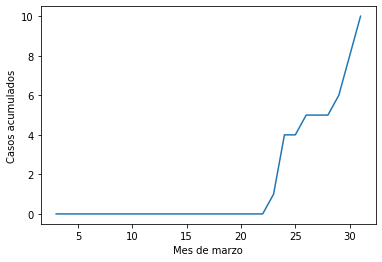

In [26]:
# Seleccionamos los contagios de marzo
contagios_marzo = numeralab[numeralab.index.month.isin([3])]

# Definimos los objetos figura y ejes
fig, ax = plt.subplots()

# Graficamos el día y los casos acumulados
ax.plot(contagios_marzo.index.day, contagios_marzo['Casos Acumulados'])

# Definimos etiquetas
ax.set_xlabel('Mes de marzo')
ax.set_ylabel('Casos acumulados')

# Mostramos el gráfico
plt.show()


## Plotting time-series with different variables

Relacionar dos series temporales que coinciden en sus tiempos, registrando valores de diferentes variables, pueden ser graficadas y requeridas de graficar en un mismo eje horizontal.

## Plotting two time-series together

Por ejemplo, consideremos el DataFrame de 'numeralab', que hemos visto anteriormente.

In [27]:
numeralab = pd.read_csv('bbddnumeralab-covid19.csv', parse_dates=['Fecha'], index_col='Fecha')
numeralab

Día  Casos Nuevos  Casos Nuevos Sin Síntomas  \
Fecha                                                        
2020-03-03    0.0           0.0                        0.0   
2020-03-04    0.0           0.0                        NaN   
2020-03-05    0.0           0.0                        NaN   
2020-03-06    0.0           0.0                        NaN   
2020-03-07    0.0           0.0                        NaN   
...           ...           ...                        ...   
2021-02-06  321.0         133.0                       44.0   
2021-02-07  322.0         108.0                       43.0   
2021-02-08  323.0         133.0                       60.0   
2021-02-09  324.0         114.0                       43.0   
2021-02-10  325.0         100.0                       21.0   

            Casos Nuevos Con Síntomas  Casos Nuevos Sin Notificar  \
Fecha                                                               
2020-03-03                        0.0                         0.0   
2020-03-04                        0.0                         NaN   
2020-03-05                        0.0                         NaN   
2020-03-06                        0.0                         NaN   
2020-03-07                        0.0                         NaN   
...                               ...                         ...   
2021-02-06                       86.0                         3.0   
2021-02-07                       64.0                         1.0   
2021-02-08                       69.0                         4.0   
2021-02-09                       64.0                         7.0   
2021-02-10                       77.0                         2.0   

            Recuperados Nuevos  Activos  Activos Probables  Fallecidos Nuevos  \
Fecha                                                                           
2020-03-03                 0.0      0.0                0.0                0.0   
2020-03-04                 0.0      0.0                0.0                0.0   
2020-03-05                 0.0      0.0                0.0                0.0   
2020-03-06                 0.0      0.0                0.0                0.0   
2020-03-07                 0.0      0.0                0.0                0.0   
...                        ...      ...                ...                ...   
2021-02-06               203.0    919.0              278.0                4.0   
2021-02-07               160.0    864.0              246.0                4.0   
2021-02-08               150.0    845.0              216.0                3.0   
2021-02-09               130.0    829.0              195.0                0.0   
2021-02-10               134.0    794.0              204.0                0.0   

            PCR Nuevos  ...  VMI Totales  RE Regional  RE Iquique  \
Fecha                   ...                                         
2020-03-03         0.0  ...          0.0          0.0        0.00   
2020-03-04         0.0  ...          NaN          NaN         NaN   
2020-03-05         0.0  ...          NaN          NaN         NaN   
2020-03-06         0.0  ...          NaN          NaN         NaN   
2020-03-07         0.0  ...          NaN          NaN         NaN   
...                ...  ...          ...          ...         ...   
2021-02-06      1710.0  ...          NaN          1.0        0.97   
2021-02-07      1260.0  ...          NaN          NaN         NaN   
2021-02-08      1757.0  ...          NaN          NaN         NaN   
2021-02-09      1374.0  ...          NaN          NaN         NaN   
2021-02-10       472.0  ...          NaN          NaN         NaN   

            RE Tamarugal  Var. Casos Nuevos (%)  Var. Recuperados (%)  \
Fecha                                                                   
2020-03-03          0.00                   0.00                  0.00   
2020-03-04           NaN                    NaN                   NaN   
2020-03-05           NaN                   0.00                  

Como antes, podemos crear una figura y ejes, agregando datos de una variable a la gráfica, con etiquetas.

Supongamos queremos observar si existe alguna relación entre los casos nuevos y la cantidad de exámenes PCR hechos.

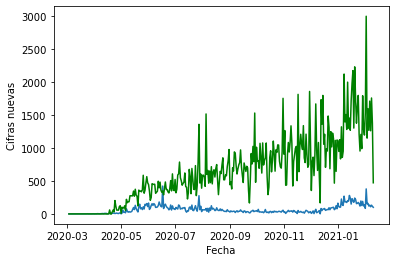

In [28]:
fig, ax = plt.subplots()
ax.plot(numeralab.index, numeralab['Casos Nuevos'])
ax.plot(numeralab.index, numeralab['PCR Nuevos'], c='g')
ax.set_xlabel('Fecha')
ax.set_ylabel('Cifras nuevas')
plt.show()

Podemos apreciar que, el gráfico anterior, no está claro. La línea para los exámenes PCR nuevos se ha desplazado hacia arriba, y la línea para los casos nuevos parece relativamente plana.

El problema es que las escalas, para estas dos mediciones, son diferentes.

Ya hemos visto cómo podríamos trazar estas series de tiempo en subtramas separadas (subgráficos).

A continuación, trazaremos los mismos subgráficos, usando dos escalas diferentes del eje Y

- Nuevamente, comenzamos agregando la primera variable a nuestros ejes.

- Luego, usamos el método twinx para crear un gemelo de estos ejes.

- Esto significa que los dos ejes comparten el mismo eje X, pero los ejes están separados.

- Luego, agregamos la otra variable a este segundo objeto de Axes 'ax2', y mostramos la figura.

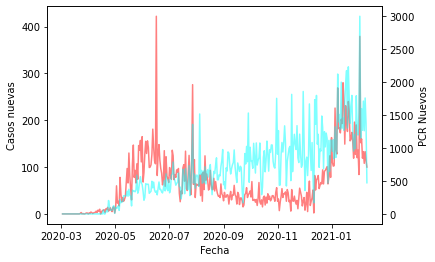

In [29]:
fig, ax = plt.subplots()

# Primera variable con transparencia 0.5 y color rojo
ax.plot(numeralab.index, numeralab['Casos Nuevos'], alpha=0.5, c='r')
ax.set_xlabel('Fecha')
ax.set_ylabel('Casos nuevas')

# Método twinx: duplicamos los ejes anteriores
ax2 = ax.twinx()

# Segunda variable con transparencia 0.5 y color celeste
ax2.plot(numeralab.index, numeralab['PCR Nuevos'], c='cyan', alpha=0.5)
ax2.set_ylabel('PCR Nuevos')

# Mostramos el gráfico
plt.show()

Ahora, observamos dos escalas del eje Y:

- Una a la izquierda, para los casos nuevos.
- Una a la derecha, para los exámenes PCR.

De esta forma, podemos ver las fluctuaciones claramente. Sin embargo, esto no está del todo bien, dado que las etiquetas no están fácilmente visibles.

## Separando variables por color

Para separar las variables y distinguirlas aún más, codificaremos cada una con un color distinto:

- Agregamos color a la primera variable, usando el argumento de la palabra clave 'color' en la llamada a la función de trazado.
- También realizamos el mismo procedimiento para la llamada a la función de etiqueta para el eje vertical (ylabel).
- Repetimos lo anterior para el objeto gemelo de 'ax', 'ax2'.

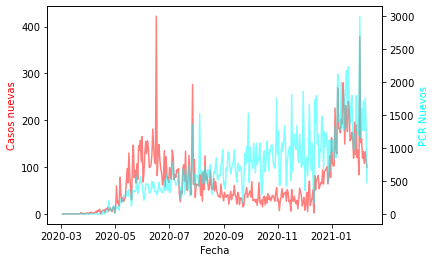

In [30]:
fig, ax = plt.subplots()

# Primera variable con transparencia 0.5 y color rojo
ax.plot(numeralab.index, numeralab['Casos Nuevos'], alpha=0.5, c='r')
ax.set_xlabel('Fecha')
ax.set_ylabel('Casos nuevas', c='r')

# Método twinx: duplicamos los ejes anteriores
ax2 = ax.twinx()

# Segunda variable con transparencia 0.5 y color celeste
ax2.plot(numeralab.index, numeralab['PCR Nuevos'], c='cyan', alpha=0.5)
ax2.set_ylabel('PCR Nuevos', c='cyan')

# Mostramos el gráfico
plt.show()

En la figura resultante, cada variable tiene su propio color y las etiquetas del eje y nos dicen claramente a qué escala pertenece a qué variable.

## Coloring the ticks

Podemos hacer que la codificación por color sea aún más clara configurando no solo el color de las etiquetas del eje y, sino también las marcas del eje y, así como las etiquetas del mismo eje:

- Ésto se hace agregando una llamada al método 'tick_params'. 

El método anterior, toma y o x como primer argumento, apuntando a el hecho de que deseamos modificar los parámetros de los ticks del eje y en este caso particular.

Para cambiar su color, usamos el argumento de palabras clave de colores, configurándolo de acuerdo a los colores que estableceremos a continuación.

Del mismo modo, deberemos llamar al mismo método para el otro objeto gemelo 'ax2'.



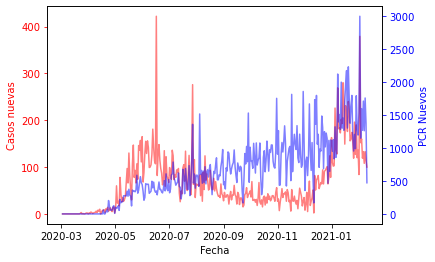

In [31]:
fig, ax = plt.subplots()

# Primera variable con transparencia 0.5 y color rojo
ax.plot(numeralab.index, numeralab['Casos Nuevos'], alpha=0.5, c='r')
ax.set_xlabel('Fecha')
ax.set_ylabel('Casos nuevas', c='r')
ax.tick_params('y', colors='r')

# Método twinx: duplicamos los ejes anteriores
ax2 = ax.twinx()

# Segunda variable con transparencia 0.5 y color celeste
ax2.plot(numeralab.index, numeralab['PCR Nuevos'], c='b', alpha=0.5)
ax2.set_ylabel('PCR Nuevos', c='b')
ax2.tick_params('y', colors='b')

# Mostramos el gráfico
plt.show()

Colorear tanto la etiqueta del eje como los ticks deja en claro qué escala usar con qué variable. Ésto parece un patrón útil.

## Definiendo una función para automatizar el proceso anterior

Antes de continuar, implementemos esto como una función que podamos reutilizar:

- Usamos la palabra clave 'def' para indicar que estamos definiendo una función llamada 'plot_timeseries'.

Esta función toma argumentos como:
- Objeto 'axes'.
- Variables 'x' e 'y' para trazar.
- Un color, 'color'.
- Una etiqueta para el eje horizontal 'xlabel'.
- Una etiqueta para el eje vertical 'ylabel'.
- Un parámetro de transparencia del trazado.

La función llama a los métodos del objeto 'axes' que hemos visto antes:

- El método 'plot'.
- Los métodos 'set_underscore_xlabel' y 'set_underscore_ylabel'.
- El método 'tick_params'.

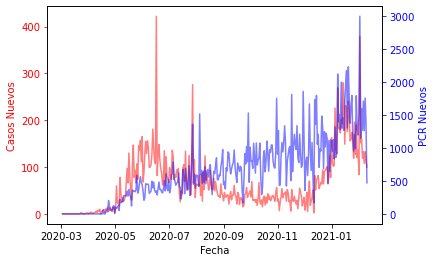

In [32]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel, alpha):
    axes.plot(x, y, c=color, alpha=alpha)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, c=color)
    axes.tick_params('y', colors=color)
    
# Usando nuestra función, no tenemos que repetir estas llamadas, y el código es más simple.

fig, ax = plt.subplots()

plot_timeseries(ax, numeralab.index, numeralab['Casos Nuevos'], 'r', 'Fecha', 'Casos Nuevos', 0.5)

plot_timeseries(ax.twinx(), numeralab.index, numeralab['PCR Nuevos'], 'b', 'Fecha', 'PCR Nuevos', 0.5)


En los siguientes ejercicios, implementaremos nuestra propia función desde cero.

### 11° EX: Plotting two variables

Básicamente lo mismo que venimos haciendo.

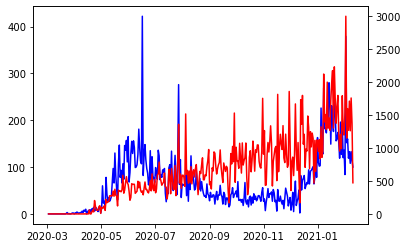

In [33]:
# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot in blue
ax.plot(numeralab.index, numeralab['Casos Nuevos'], color='b')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot in red
ax2.plot(numeralab.index, numeralab['PCR Nuevos'], color='r')

plt.show()

### 12° EX: Defining a function that plots time-series data

Definiendo función.

In [34]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel, alpha):
    axes.plot(x, y, c=color, alpha=alpha)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, c=color)
    axes.tick_params('y', colors=color)

### 12° EX: Using a plotting function

Usando función.

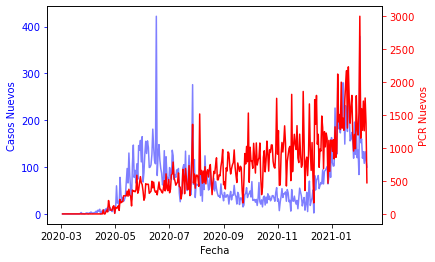

In [35]:
fig, ax = plt.subplots()

# Plot in blue
plot_timeseries(ax, numeralab.index, numeralab['Casos Nuevos'], 'blue', 'Fecha', 'Casos Nuevos', 0.5)

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot in red
plot_timeseries(ax2, numeralab.index, numeralab['PCR Nuevos'], 'red', 'Fecha', 'PCR Nuevos', 1)

plt.show()

## Anotando time-series data

Una forma importante de mejorar una visualización es agregando anotaciones. Las anotaciones suelen ser pequeños fragmentos de texto que se refieren a una parte particular de la visualización, centrando nuestra atención en alguna característica de los datos y explicándola.

## Time-series data

Por ejemplo, consideremos los datos que habíamos visto. 

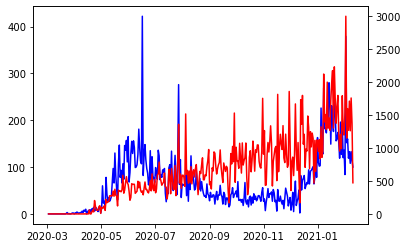

In [36]:
# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot in blue
ax.plot(numeralab.index, numeralab['Casos Nuevos'], color='b')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot in red
ax2.plot(numeralab.index, numeralab['PCR Nuevos'], color='r')

plt.show()

Recordemos que, estos datos nos indicaban la cantidad de casos nuevos y exámenes PCR por COVID-19 hechos en la región de Tarapacá, Chile, medidos por día.

Esto implica, casi un año de observaciones, por lo que es una cantidad considerable de datos, y al presentarlos, es posible que se desee centrar la atención en un aspecto particular de estos datos.

Una forma de llamar la atención sobre una parte del gráfico es anotándola.

Esto podría significar dibujar una flecha que apunte a una parte de la trama, y poder incluir texto en modo de explicación.

## Anotaciones

Por ejemplo, digamos que notamos que la primera fecha en la que hubo un salto en los casos nuevos fue, aproximadamente, en junio del 2020. Nos gustaría señalar esto en el gráfico.

Aquí está el código que genera el gráfico, usando la función 'plot_timeseries', con la diferencia que añadimos una llamada al método 'annotate'.

Esta función, 'anotate', toma como mínimo, el texto de anotación como entrada, en este caso, la cadena '> 1 grado' y la coordenada xy que nos gustaría anotar.

A continuación, el valor a anotar tiene la posición X del 'sello de tiempo' de la fecha (usamos el objeto de marca de tiempo Pandas para definirlo), mientras la posición Y el número de casos nuevos.

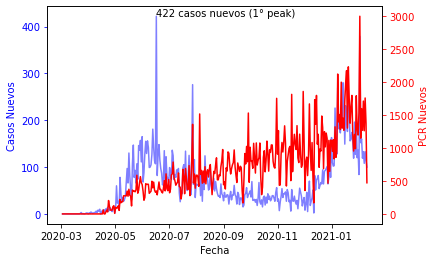

In [37]:
fig, ax = plt.subplots()


# Plot
plot_timeseries(ax, numeralab.index, numeralab['Casos Nuevos'], 'blue', 'Fecha', 'Casos Nuevos', 0.5)

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot
plot_timeseries(ax2, numeralab.index, numeralab['PCR Nuevos'], 'red', 'Fecha', 'PCR Nuevos', 1)

ax.annotate("422 casos nuevos (1° peak)", xy=[pd.Timestamp("2020-06-17"), 422])

plt.show()

Sin embargo, no se ve muy bien. El texto aparece cercano a la parte superior, no respetando el margen... ¿Quizás podríamos moverlo?

## Posicionando el texto

El método de anotación toma un argumento opcional de texto xy, que selecciona la posición xy del texto. Después de experimentar un poco, descubrimos que se ajusta mejor el texto:

- X: '2020-07-15'.

- Y: 400.



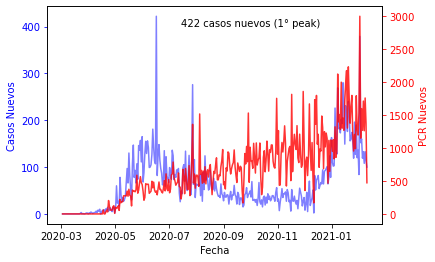

In [38]:
fig, ax = plt.subplots()


# Plot
plot_timeseries(ax, numeralab.index, numeralab['Casos Nuevos'], 'blue', 'Fecha', 'Casos Nuevos', 0.5)

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot
plot_timeseries(ax2, numeralab.index, numeralab['PCR Nuevos'], 'red', 'Fecha', 'PCR Nuevos', 0.8)

ax.annotate("422 casos nuevos (1° peak)", xy=[pd.Timestamp('2020-06-17'), 422], xytext=(pd.Timestamp('2020-07-15'), 400))

plt.show()

El problema ahora es que no hay forma de ver qué punto de datos es el que se está anotando. Agreguemos una flecha que conecte el texto a los datos.

## Añadiendo flechas a las anotaciones

Para conectar el texto de anotación y los datos anotados, podemos agregar una flecha. El argumento, con palabra clave 'arrowprops', es el que se utiliza para ésto, que significa las propiedades de la flecha.

Este argumento toma como entrada un diccionario que define las propiedades de la flecha que nos gustaría usar. 

Si pasamos un diccionario vacío, la flecha tendrá las propiedades predeterminadas.

## Customizando las propiedades de las flechas

También podemos personalizar la apariencia de la flecha, como se verá a continuación. Por ejemplo, en el siguiente código establecimos que el estilo de la flecha sea una línea delgada con una cabeza ancha ('->'), y también establecemos el color en gris ('gray'). Ésto es un poco más sutil.

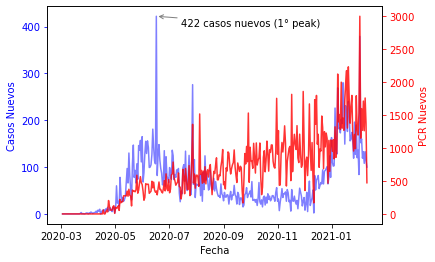

In [39]:
fig, ax = plt.subplots()


# Plot
plot_timeseries(ax, numeralab.index, numeralab['Casos Nuevos'], 'blue', 'Fecha', 'Casos Nuevos', 0.5)

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot 
plot_timeseries(ax2, numeralab.index, numeralab['PCR Nuevos'], 'red', 'Fecha', 'PCR Nuevos', 0.8)

ax.annotate("422 casos nuevos (1° peak)", xy=[pd.Timestamp('2020-06-17'), 422], xytext=(pd.Timestamp('2020-07-15'), 400), arrowprops={'arrowstyle':'->', 'color':'gray'})

plt.show()

## Customizando las anotaciones

Hay muchas opciones para personalizar las propiedades de flecha y otras propiedades de anotación, sobre las que se puede leer [aquí, en la documentación de matplotlib](https://matplotlib.org/2.0.2/users/annotations.html). 

Por ahora, comencemos practicando lo que hemos aprendido hasta ahora.

### 13° EX: Annotating a plot of time-series data

Usaremos el método 'annotate'.

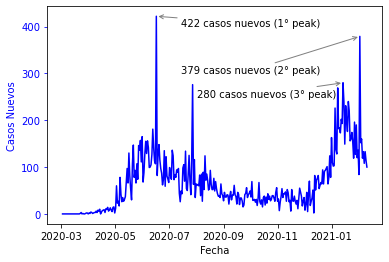

In [40]:
fig, ax = plt.subplots()


# Plot in blue
plot_timeseries(ax, numeralab.index, numeralab['Casos Nuevos'], 'blue', 'Fecha', 'Casos Nuevos', 1)

ax.annotate("422 casos nuevos (1° peak)", xy=[pd.Timestamp('2020-06-17'), 422], xytext=(pd.Timestamp('2020-07-15'), 400), arrowprops={'arrowstyle':'->', 'color':'gray'})

ax.annotate("379 casos nuevos (2° peak)", xy=[pd.Timestamp('2021-02-02'), 379], xytext=(pd.Timestamp('2020-07-15'), 300), arrowprops={'arrowstyle':'->', 'color':'gray'})

ax.annotate("280 casos nuevos (3° peak)", xy=[pd.Timestamp('2021-01-14'), 280], xytext=(pd.Timestamp('2020-08-02'), 250), arrowprops={'arrowstyle':'->', 'color':'gray'})

plt.show()

### 14° EX: Plotting time-series: putting it all together

Usaremos el método 'annotate'. Repetiremos el mismo ejercicio de antes.

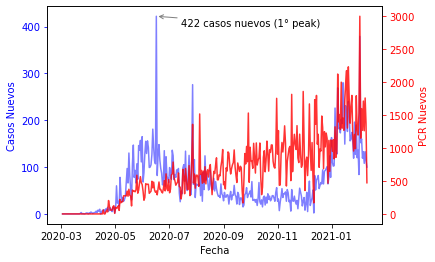

In [41]:
fig, ax = plt.subplots()


# Plot
plot_timeseries(ax, numeralab.index, numeralab['Casos Nuevos'], 'blue', 'Fecha', 'Casos Nuevos', 0.5)

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot 
plot_timeseries(ax2, numeralab.index, numeralab['PCR Nuevos'], 'red', 'Fecha', 'PCR Nuevos', 0.8)

ax.annotate("422 casos nuevos (1° peak)", xy=[pd.Timestamp('2020-06-17'), 422], xytext=(pd.Timestamp('2020-07-15'), 400), arrowprops={'arrowstyle':'->', 'color':'gray'})

plt.show()

En el próximo capítulo, aprenderemos a realizar comparaciones cuantativas con gráficos.

## Comparaciones cuantitativas: gráficos de barras

En el capítulo anterior, vimos cómo convertir la data en descripciones visuales. En este capítulo, nos centraremos en las comparaciones cuantitativas, entre partes de los datos.

En este sentido, podemos crear una visualización de datos con barras.

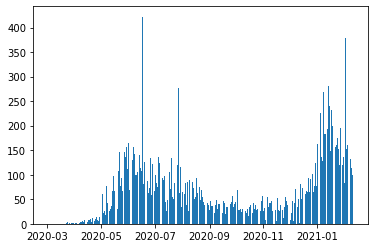

In [42]:
# Creamos la figura y los ejes
fig, ax = plt.subplots()

# Definimos el gráfico
ax.bar(numeralab.index, numeralab['Casos Nuevos'])

# Mostramos el gráfico
plt.show()

Este gráfico, muestra una barra para cada día en la columna 'Casos Nuevos', donde la altura representa el número de la fila.

Las etiquetas de los ticks del eje X corresponden al índice del DataFrame, con cada día, en cada mes, a partir de, aproximadamente, marzo del 2020.

## Rotando las etiquetas de los ejes

En caso de que las fechas o etiquetas del eje X se superpusieran una encima de la otra, podríamos rotarlas en 90° grados. Esto se puede realizar utilizando el método 'set_xticklabels' de los ejes.

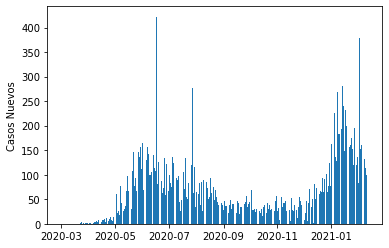

In [43]:
# Creamos la figura y los ejes
fig, ax = plt.subplots()

# Definimos el gráfico
ax.bar(numeralab.index, numeralab['Casos Nuevos'])

# Establecemos la etiqueta del eje Y
ax.set_ylabel('Casos Nuevos')

# Mostramos el gráfico
plt.show()

Visualizar los datos de esta manera, nos muestra qué días se obtuvo un gran número de casos nuevos en la región de Tarapacá, Chile, evidenciando las diferencias entre meses de altos índices de contagio.

## Visualizando varios datos a la vez

A continuación, nos gustaría agregar los datos sobre recuperados o fallecidos.

Para agregar esta información en el mismo diagrama, crearemos un gráfico de barras.
También, podríamos crear un gráfico de barras apiladas, que implica que cada nuevo dato se apilará sobre los datos anteriores, esto se viene a llamar 'stacked bar' y es posible conseguirlo pasando la palabra clave 'bottom', pero en este caso particular omitiremos dado que no nos serviría.

Sin embargo, hacer un 'stacked bar':

- Añadimos la palabra clave inferior 'bottom' para decirle a Matplotlib que los datos de esta columna deben estar a la altura de los datos de la columna anterior.

ipykernel_launcher:11: UserWarning: FixedFormatter should only be used together with FixedLocator


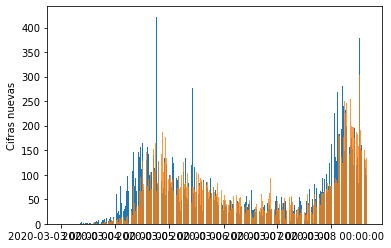

In [44]:
# Creamos la figura y los ejes
fig, ax = plt.subplots()

# Definimos el gráfico
ax.bar(numeralab.index, numeralab['Casos Nuevos'])

# Definimos el gráfico apilado
ax.bar(numeralab.index, numeralab['Recuperados Nuevos'], alpha = 0.8)

# Definimos los ticks del eje X
ax.set_xticklabels(numeralab.index)

# Establecemos la etiqueta del eje Y
ax.set_ylabel('Cifras nuevas')

# Mostramos el gráfico
plt.show()

Vemos que las fechas se superponen. Las corregimos.

ipykernel_launcher:11: UserWarning: FixedFormatter should only be used together with FixedLocator


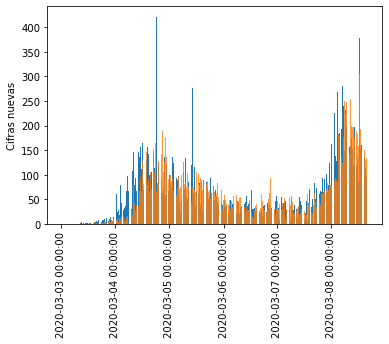

In [45]:
# Creamos la figura y los ejes
fig, ax = plt.subplots()

# Definimos el gráfico
ax.bar(numeralab.index, numeralab['Casos Nuevos'])

# Definimos el gráfico apilado
ax.bar(numeralab.index, numeralab['Recuperados Nuevos'], alpha=0.8)

# Rotamos en 90° los ticks del eje X
ax.set_xticklabels(numeralab.index, rotation=90)

# Establecemos la etiqueta del eje Y
ax.set_ylabel('Cifras nuevas')

# Mostramos el gráfico
plt.show()

## Visualizando los tres al mismo tiempo

Del mismo modo, podemos agregar el número de Activos. 

Si deséaramos realizar un gráfico de barras acumulado, deberíamos establecer la parte inferior del gráfico de barras a los casos nuevos u a la suma de casos nuevos y recuperados nuevos.

Nuevamente, en este caso particular, no establecemos 'bottom', dado que no se trata de cifras que deban acumularse, por lo que no nos sirve el 'stacked bar'.

ipykernel_launcher:14: UserWarning: FixedFormatter should only be used together with FixedLocator


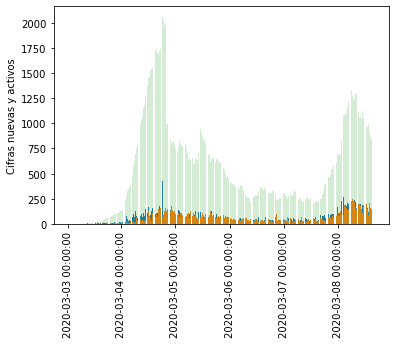

In [46]:
# Creamos la figura y los ejes
fig, ax = plt.subplots()

# Definimos el gráfico
ax.bar(numeralab.index, numeralab['Casos Nuevos'])

# Definimos el gráfico apilado
ax.bar(numeralab.index, numeralab['Recuperados Nuevos'])

# Definimos el segundo gráfico apilado
ax.bar(numeralab.index, numeralab['Activos'], alpha=0.2)

# Rotamos en 90° los ticks del eje X
ax.set_xticklabels(numeralab.index, rotation=90)

# Establecemos la etiqueta del eje Y
ax.set_ylabel('Cifras nuevas y activos')

# Mostramos el gráfico
plt.show()

## Añadiendo una leyenda

Para hacer que esta figura sea más fácil de leer y entender, a nosotros también nos gustaría etiquetar qué color corresponde a qué cifra.

Para hacer esto, necesitamos agregar dos cosas:

- Lo primero, es agregar el argumento de palabra clave 'label' a cada llamada del método de barras, con las etiquetas para las barras trazadas en la llamada.

- Lo segundo es agregar una llamada al método de leyenda Axes antes de llamar a show.

Si realizamos lo anterior, esto agregará una leyenda que nos dice qué color representa qué cifra.

ipykernel_launcher:14: UserWarning: FixedFormatter should only be used together with FixedLocator


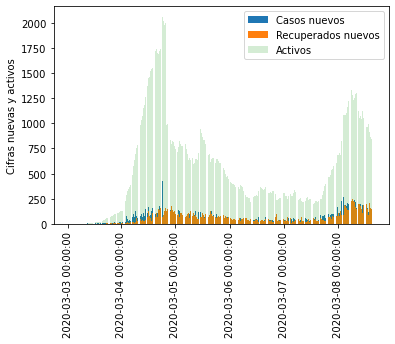

In [47]:
# Creamos la figura y los ejes
fig, ax = plt.subplots()

# Definimos el gráfico
ax.bar(numeralab.index, numeralab['Casos Nuevos'], label='Casos nuevos')

# Definimos el gráfico apilado
ax.bar(numeralab.index, numeralab['Recuperados Nuevos'], label='Recuperados nuevos')

# Definimos el segundo gráfico apilado
ax.bar(numeralab.index, numeralab['Activos'], label='Activos', alpha=0.2)

# Rotamos en 90° los ticks del eje X
ax.set_xticklabels(numeralab.index, rotation=90)

# Establecemos la etiqueta del eje Y
ax.set_ylabel('Cifras nuevas y activos')

# Mostramos la leyenda
ax.legend()

# Mostramos el gráfico
plt.show()

### 15° EX: Gráfico de barras

Visualizaremos con gráfico de barras.

ipykernel_launcher:8: UserWarning: FixedFormatter should only be used together with FixedLocator


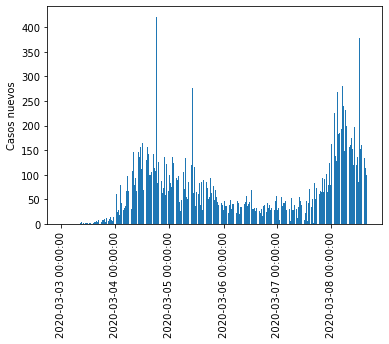

In [48]:
# Agregamos el objeto figura y eje
fig, ax = plt.subplots()

# Plot
ax.bar(numeralab.index, numeralab['Casos Nuevos'])

# Set the x-axis tick labels
ax.set_xticklabels(numeralab.index, rotation = 90)

# Set the y-axis label
ax.set_ylabel('Casos nuevos')

# Mostramos el gráfico
plt.show()

### 16° EX: Gráfico de barras apilado

Visualizaremos un gráfico de barras acumulado a forma de experimento.

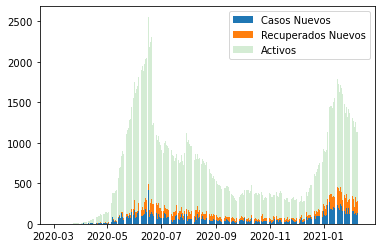

In [49]:
# Agregamos el objeto figura y eje
fig, ax = plt.subplots()

# Add bars
ax.bar(numeralab.index, numeralab['Casos Nuevos'], label='Casos Nuevos')

# Stack bars
ax.bar(numeralab.index, numeralab['Recuperados Nuevos'], bottom=numeralab['Casos Nuevos'], label='Recuperados Nuevos')

# Stack bars again
ax.bar(numeralab.index, numeralab['Activos'], bottom=numeralab['Recuperados Nuevos'] + numeralab['Casos Nuevos'], label='Activos', alpha=0.2)

# Display the legend
ax.legend()

# Mostramos el gráfico
plt.show()

## Comparaciones cuantitativas: histogramas

Los gráficos de barras nos muestran el valor de una variable en diferentes condiciones.

Ahora, veremos los histogramas. La visualización es útil porque demuestra la distribución completa de los valores en una variable.

## Gráfico de barras de nuevo

Veamos cómo variaron las cifras diarias en un gráfico de barras:

- Partimos agregando la figura y los ejes.

- Luego, agregamos una barra con la media de los "casos nuevos".

- También, agregamos una barra con la media de la columna "recuperados nuevos".

- Establecemos la etiqueta del eje Y.

- Mostramos la figura.

Y ésto nos brinda la diferencia entre cada cifra.

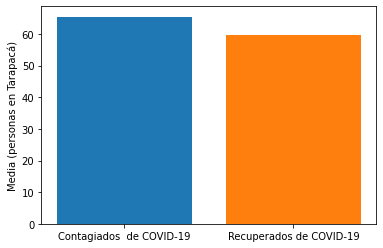

In [50]:
# Creamos los objetos figura y eje
fig, ax = plt.subplots()

# Definimos el gráfico de barras para la media de los casos nuevos
ax.bar("Contagiados  de COVID-19", numeralab['Casos Nuevos'].mean())

# Ídem, pero para recuperados nuevos
ax.bar("Recuperados de COVID-19", numeralab['Recuperados Nuevos'].mean())

# Renombramos el eje Y
ax.set_ylabel("Media (personas en Tarapacá)")

# Mostramos el gráfico
plt.show()

## Introduciendo los histogramas

Pero un histograma mostraría la distribución completa de valores dentro de cada variable:

- Comenzamos de nuevo inicializando una figura y ejes.

- Luego, llamamos al método 'hist' de los ejes 'ax' con toda la columna 'casos nuevos' del DataFrame 'numeralab'.

- Repetimos lo anterior con la columna de recuperados nuevos.

En histograma que se mostrará:

- El eje X son los valores dentro de la variable Y.

- La altura de las barras representa el número de observaciones dentro de un 'bin' particular de valores (el 'bin' es el rectángulo).

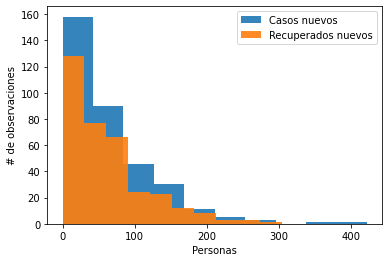

In [51]:
fig, ax = plt.subplots()

# Definimos los histogramas
ax.hist(numeralab['Casos Nuevos'], label='Casos nuevos', alpha = 0.9)
ax.hist(numeralab['Recuperados Nuevos'], label = 'Recuperados nuevos', alpha = 0.9)

# Customizamos y mostramos el gráfico
ax.set_xlabel("Personas")
ax.set_ylabel("# de observaciones")
ax.legend()
plt.show()

Por ejemplo:

- Hay, aproximadamente, 155 días en los cuales hubo bajo de 50 casos nuevos (la barra más alta del histograma).

- De igual forma, hay, aproximadamente, 130 días en los cuales hubo bajo de 50 recuperados nuevos.

- La menor cantidad de días se distribuye en 350-400 casos nuevos, habiendo bajo de 10 días en los cuales se presentó esa cantidad de personas enfermas por COVID-19.

## Las etiquetas son necesarias

Debido a que la etiqueta del eje X ya no proporciona información sobre qué color representa qué variable, se necesitan etiquetas en los histogramas. Como antes, podemos etiquetar una variable llamando al método 'hist' con el argumento de palabra clave 'label' (de etiqueta), y posteriormente, llamamos al método de leyenda antes de llamar a 'plt.show()'.

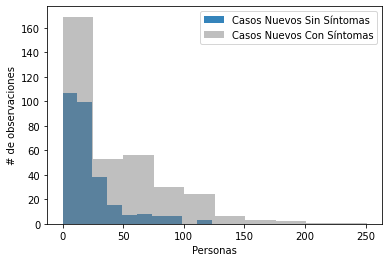

In [52]:
fig, ax = plt.subplots()

# Definimos los histogramas
ax.hist(numeralab['Casos Nuevos Sin Síntomas'], label='Casos Nuevos Sin Síntomas', alpha = 0.9)
ax.hist(numeralab['Casos Nuevos Con Síntomas'], label = 'Casos Nuevos Con Síntomas', alpha = 0.5, color = 'gray')

# Customizamos y mostramos el gráfico
ax.set_xlabel("Personas")
ax.set_ylabel("# de observaciones")
ax.legend()
plt.show()

## Customizando los histogramas: colocando el número de bins

Tal vez, nos preguntemos cómo Matplotlib decide dividir los datos en las diferentes barras:

- Por defecto, el número de barras o 'bins' en un histograma es 10, pero podemos personalizarlo.

Si proporcionamos un número entero al argumento de palabra clave 'bins', el histograma tendrá ese número de bins.

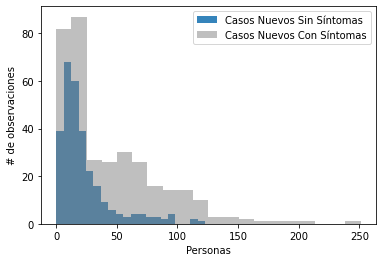

In [53]:
fig, ax = plt.subplots()

# Definimos los histogramas con bins
ax.hist(numeralab['Casos Nuevos Sin Síntomas'], label='Casos Nuevos Sin Síntomas', alpha = 0.9, bins=20)
ax.hist(numeralab['Casos Nuevos Con Síntomas'], label = 'Casos Nuevos Con Síntomas', alpha = 0.5, color = 'gray', bins=20)

# Customizamos y mostramos el gráfico
ax.set_xlabel("Personas")
ax.set_ylabel("# de observaciones")
ax.legend()
plt.show()

## Customizando histogramas: configurando el número de bins en secuencias

Si en su lugar, proporcionamos una secuencia de valores, estos números se establecerán como los límites entre los contenedores, como se muestra aquí.

## Nota

- La función 'np.arrange(x, y, z)' nos permite generar un vector desde X hasta Y con incrementos de Z.

In [54]:
np.arange(0, 270, 5)

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
       260, 265])

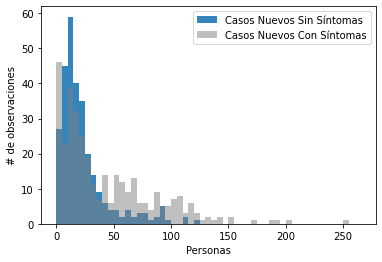

In [55]:
fig, ax = plt.subplots()

# Definimos los histogramas con bins
ax.hist(numeralab['Casos Nuevos Sin Síntomas'], label='Casos Nuevos Sin Síntomas', alpha = 0.9, bins=np.arange(0, 270, 5))
ax.hist(numeralab['Casos Nuevos Con Síntomas'], label = 'Casos Nuevos Con Síntomas', alpha = 0.5, color = 'gray', bins=np.arange(0, 270, 5))

# Customizamos y mostramos el gráfico
ax.set_xlabel("Personas")
ax.set_ylabel("# de observaciones")
ax.legend()
plt.show()

Hay una última cosa para personalizar. Mirando las cifras, podemos preguntarnos si hay algun día que se hayan presentado sobre 300 casos nuevos. Ésto es díficil de decir porque las barras para el histograma de gimnasia están ocluyendo la información.

## Customizando histogramas: transparencia

La oclusión se puede eliminar cambiando el tipo de histograma que se utiliza. En lugar del tipo de "barra" que se usa por defecto, podemos especificar un tipo histórico de "paso", que muestra el histograma como líneas finas, en lugar de líneas continuas.

De esta forma, podemos apreciar de mejor forma los datos.

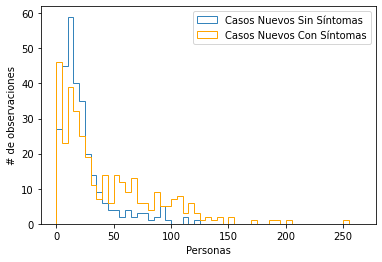

In [56]:
fig, ax = plt.subplots()

# Definimos los histogramas con bins
ax.hist(numeralab['Casos Nuevos Sin Síntomas'], label='Casos Nuevos Sin Síntomas', alpha = 0.9, bins=np.arange(0, 270, 5), histtype='step')
ax.hist(numeralab['Casos Nuevos Con Síntomas'], label = 'Casos Nuevos Con Síntomas', color = 'orange', bins=np.arange(0, 270, 5), histtype='step')

# Customizamos y mostramos el gráfico
ax.set_xlabel("Personas")
ax.set_ylabel("# de observaciones")
ax.legend()
plt.show()

## Ejercicios

En los ejercicios, crearemos nuestros propios histogramas.

### 17° EX: Creando histogramas

Visualizaremos un histograma.

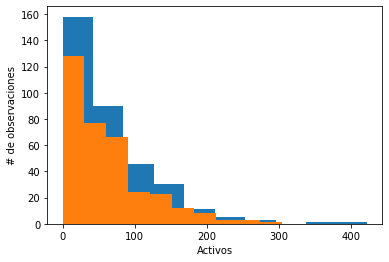

In [57]:
fig, ax = plt.subplots()
# Plot a histogram
ax.hist(numeralab['Casos Nuevos'])

# Compare to histogram
ax.hist(numeralab['Recuperados Nuevos'])

# Set the x-axis label
ax.set_xlabel('Activos')

# Set the y-axis label
ax.set_ylabel('# de observaciones')

plt.show()

### 18° EX: Creando histogramas "step"

Visualizaremos un histograma con el tipo "step".

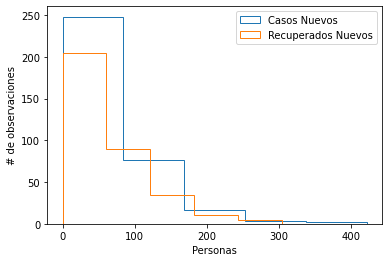

In [58]:
fig, ax = plt.subplots()

# Plot a histogram
ax.hist(numeralab['Casos Nuevos'], histtype='step', label='Casos Nuevos', bins=5)

# Compare to histogram
ax.hist(numeralab['Recuperados Nuevos'], histtype='step', label='Recuperados Nuevos', bins=5)

ax.set_xlabel("Personas")
ax.set_ylabel("# de observaciones")

# Add the legend and show the Figure
ax.legend()
plt.show()

## Gráficos estadísticos

En la lección anterior, vimos como crear histogramas que comparan distribuciones de datos.

¿Cómo podemos hacer que estas comparaciones sean más formales?

El trazado estadístico es un conjunto de métodos para usar la visualización para hacer comparaciones.

Aquí veremos dos de estas técnicas.

## Añadiendo barras de error en los gráficos

El primero, es el uso de barras de error en los gráficos. 

Estos, son marcadores adicionales en una gráfica que nos dicen algo sobre la distribución de los datos.

Los histogramas, que vimos en lecciones anteriores, muestran la distribución completa.

Las barras de error, en comparación, resumen la distribución de los datos en un número, como la desviación estándar de los valores.

Para demostrar esto, utilizaremos los mismos datos que hemos trabajado hasta ahora.

Hay, al menos, dos formas diferentes de mostrar barras de error.

A continuación, agregamos la barra de error como argumento a un gráfico de barras.

Cada llamada al método 'ax.bar' toma:
- Argumento xy.
- Argumento y.

En este caso, y es la media de la casos nuevos.

El argumento de palabra clave de 'yerr' toma un argumento adicional:

- En este caso, la desviación estándar de la columna 'Casos Nuevos', y muestra eso como un marcador vertical adicional.

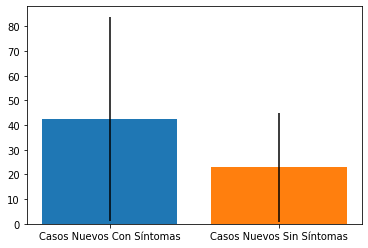

In [59]:
fig, ax = plt.subplots()

# Graficamos
ax.bar('Casos Nuevos Con Síntomas', numeralab['Casos Nuevos Con Síntomas'].mean(), yerr=numeralab['Casos Nuevos Con Síntomas'].std())

# Graficamos
ax.bar('Casos Nuevos Sin Síntomas', numeralab['Casos Nuevos Sin Síntomas'].mean(), yerr=numeralab['Casos Nuevos Sin Síntomas'].std())

ax.set_ylabel = 'Personas'
plt.show()

## Barras de error en gráficos de barras

Allí el gráfico. Es útil porque resume la distribución completa que vimos en los histogramas en dos números: el valor medio y la dispersión de valores, cuantificados como al desviación estándar.

En este sentido, la barra adicional vertical nos entrega la desviación estándar. Veamos los valores cuantificados.

In [60]:
## Casos Nuevos Con Síntomas
print('La media de los valores fue de {} y la desviación estándar del {}. \n'.format(round(numeralab['Casos Nuevos Con Síntomas'].mean(), 2), round(numeralab['Casos Nuevos Con Síntomas'].std(), 2)))

## Casos Nuevos Sin Síntomas
print('La media de los valores fue de {} y la desviación estándar del {}.'.format(round(numeralab['Casos Nuevos Sin Síntomas'].mean(), 2), round(numeralab['Casos Nuevos Sin Síntomas'].std(), 2)))

La media de los valores fue de 42.52 y la desviación estándar del 41.44. 

La media de los valores fue de 22.92 y la desviación estándar del 22.0.


In [61]:
## Qué nos dice la desviación estándar

print('\n \n La desviación estándar de los casos nuevos con síntomas, calculada, fue del {} estimando que, en promedio, la diferencia entre la media y cada uno de los casos nuevos con síntomas fue un poco menos de {} casos nuevos. \n \n'.format(round(numeralab['Casos Nuevos Con Síntomas'].std(), 3), round(numeralab['Casos Nuevos Con Síntomas'].std(), 2)))

print('La desviación estándar de los casos nuevos sin síntomas, calculada, fue del {} estimando que, en promedio, la diferencia entre la media y cada uno de los casos nuevos sin síntomas fue un poco menos de {} casos nuevos.'.format(round(numeralab['Casos Nuevos Sin Síntomas'].std(), 3), round(numeralab['Casos Nuevos Sin Síntomas'].std(), 2)))


 
 La desviación estándar de los casos nuevos con síntomas, calculada, fue del 41.442 estimando que, en promedio, la diferencia entre la media y cada uno de los casos nuevos con síntomas fue un poco menos de 41.44 casos nuevos. 
 

La desviación estándar de los casos nuevos sin síntomas, calculada, fue del 21.997 estimando que, en promedio, la diferencia entre la media y cada uno de los casos nuevos sin síntomas fue un poco menos de 22.0 casos nuevos.


## Añadiendo barras de error a los gráficos

También podemos agregar barras de error a un diagrama lineal.

Para trazar estos datos con barras de error, utilizaremos el método de la barra de error de axes, 'errorbar'.

Al igual que el método de trazado, este método toma una secuencia de valores X:

- En este caso, la columna de las fechas (en el índice).

Además, una secuencia de valores Y:

- En este caso, la columna de los casos nuevos por día.

Además, el argumento de palabra clave 'yerr' puede tomar la columna de las desviaciones estándar de los casos nuevos.

Similar a antes, esto agrega marcadores verticales a la trama, que se ven superpuestos unos entre otros (es el ancho de la gráfica con transparencia).

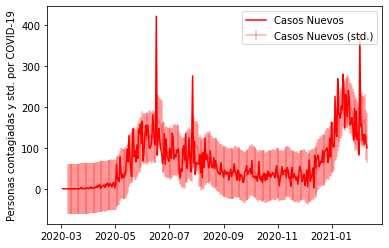

In [62]:
fig, ax = plt.subplots()

# Graficamos las barras de error std
ax.errorbar(numeralab.index, numeralab['Casos Nuevos'].rolling(window=7).mean(), yerr=numeralab['Casos Nuevos'].std(), label = 'Casos Nuevos (std.)', alpha= 0.3, c='red')

# Gráfico de líneas común
ax.plot(numeralab.index, numeralab['Casos Nuevos'], label = 'Casos Nuevos', c='red')

# Colocamos el label para Y
ax.set_ylabel('Personas contagiadas y std. por COVID-19')

# Mostramos la leyenda
ax.legend()

# Le pedimos a matplotlib que nos muestre el gráfico
plt.show()

## Nota

El método '.rolling(window=7)' permite obtener un subset de todo el conjunto de datos, con una ventana de siete filas. Es decir, si tuviéramos:

- {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

El rolling con ventana 'window=2' obtiene los siguientes subset:

- {NaN}, {0, 1}, {1, 2}, {2, 3}, {3, 4}, {4, 5}, {5,6}, {6, 7}, {7, 8}, {8, 9}

Y si aplicamos una suma a cada uno de estos datos:

- {0}, {1}, {3}, {5}, {7}, {9}, {11}, {13}, {15}, {17}

Y cada uno de ellos, en una fila distinta.

Notar que, en el inicio, tenemos un {NaN} porque no hay otra columna que sumar al iniciar, considerando que se mantiene la misma dimensionalidad en cada rolling. Dependiendo de la ventana, tendremos con:

- Un window=2, un dato faltante.

- Un window=3, dos datos faltantes.

- Y así sucesivamente, en razón de las ventanas de tiempo en las que se requieren datos para realizar algún cálculo.

Veamos si es así.

Así mismo, podemos calcular medias móviles, entre otros.

In [63]:
print(pd.Series(np.arange(0, 10, 1)).rolling(window = 2).sum())

0     NaN
1     1.0
2     3.0
3     5.0
4     7.0
5     9.0
6    11.0
7    13.0
8    15.0
9    17.0
dtype: float64


## Añadiendo gráficos de caja

La segunda técnica de visualización estadística que veremos es el diagramado de caja.

Ésta es una técnica de visualización inventada por John Tukey, posiblemente, el primer científico de datos.

Se implementa como un método del objeto 'ax'.

Podemos llamarlo con una secuencia de secuencias.

En este caso, crearemos una lista de la columna 'Casos Nuevos' y la columna 'Recuperados Nuevos'. Ahora, deberemos pasar la lista al método.

Debido a que el diagramado de caja no reconoce las etiquetas en cada una de las variables, las agregamos por separado, etiquetando el eje Y también.

Finalmente, mostramos la figura.

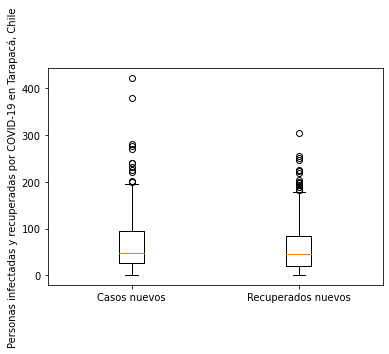

In [64]:
fig, ax = plt.subplots()

# Graficamos un diagramado de caja pasándole una lista con las variables
ax.boxplot([numeralab['Casos Nuevos'], numeralab['Recuperados Nuevos']])

# Colocamos independientemente las label para cada caja
ax.set_xticklabels(['Casos nuevos', 'Recuperados nuevos'])

# Label para Y
ax.set_ylabel('Personas infectadas y recuperadas por COVID-19 en Tarapacá, Chile')

plt.show()

## Interpretando diagramados de caja

Este tipo de gráfico nos muestra varios puntos de referencia en cada distribución. La línea naranja indica la mediana.

Por otro lado, los bordes de la caja indican el rango intercuartil entre los percentiles 25% y 75%.

Los bigotes en los extremos de las barras delgadas indican una vez y media el tamaño del rango intercuartil, más allá de los percentiles 25% y 75%.

Esto debería abarcar aproximadamente el 99% de la distribución si los datos son gaussianos o normales.

Los puntos que aparecen más allá de los bigotes son valores atípicos (outliers). Esto significa que tienen valores mayores o menores que los que esperaríamos en el 99% de los datos en una distribución gaussiana o normal.

Por ejemplo:

- En los casos nuevos, hubo un día que, atípicamente, hubo un valor mayor a los 400.

- En los recuperados nuevos, hubo un día que, atípicamente, los recuperados excedieron los 300.

## Ejercicios

En los ejercicios, haremos nuestras propias visualizaciones estadísticas.

### 19° EX: Añadiendo errores de barras en un gráfico de barras

Añadiremos los errores de barras a los datos de los casos nuevos y recuperados nuevos.

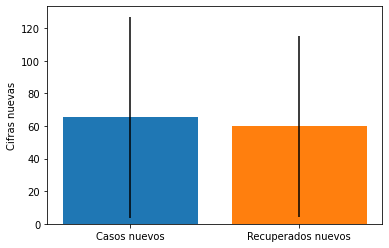

In [65]:
fig, ax = plt.subplots()

# Graficamos para casos nuevos
ax.bar('Casos nuevos', numeralab['Casos Nuevos'].mean(), yerr=numeralab['Casos Nuevos'].std())

# Graficamos para recuperados nuevos
ax.bar('Recuperados nuevos', numeralab['Recuperados Nuevos'].mean(), yerr=numeralab['Recuperados Nuevos'].std())

ax.set_ylabel('Cifras nuevas')
plt.show()

### 20° EX: Añadiendo barras de error a un gráfico

Añadiremos los errores de barras a los datos de los casos nuevos y recuperados nuevos en un gráfico de líneas.

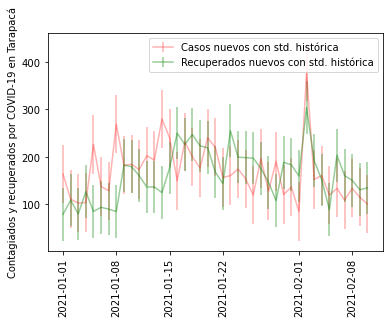

In [66]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(numeralab[numeralab.index >= '2021-01-01'].index, numeralab[numeralab.index >= '2021-01-01']['Casos Nuevos'], yerr=numeralab['Casos Nuevos'].std(), label = 'Casos nuevos con std. histórica', c='r', alpha = .3)

# Add Austin temperature data in each month with error bars
ax.errorbar(numeralab[numeralab.index >= '2021-01-01'].index, numeralab[numeralab.index >= '2021-01-01']['Recuperados Nuevos'], yerr=numeralab['Recuperados Nuevos'].std(), label = 'Recuperados nuevos con std. histórica', c='g', alpha = .4)

# Set the y-axis label
ax.set_ylabel('Contagiados y recuperados por COVID-19 en Tarapacá')
plt.xticks(rotation=90)
ax.legend()

plt.show()

### 21° EX: Creando diagramados de caja

Los diagramados de caja proporcionan información adicional sobre la distribución de la data. En este sentido, nos define la mediana y la distribución en torno a ella. Además, nos brinda los cuartiles 25% y 75%, y los valores atípicos.

Repetiremos el ejercicio anterior.

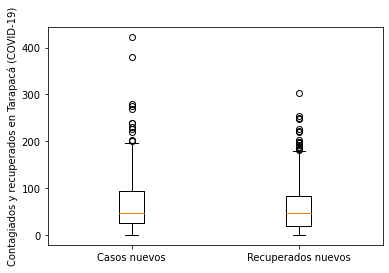

In [67]:
fig, ax = plt.subplots()

# Add a boxplot 
ax.boxplot([numeralab['Casos Nuevos'], numeralab['Recuperados Nuevos']])

# Add x-axis tick labels
ax.set_xticklabels(['Casos nuevos', 'Recuperados nuevos'])

# Add a y-axis label
ax.set_ylabel('Contagiados y recuperados en Tarapacá (COVID-19)')

plt.show()

## Comparaciones cuantitativas: gráficos de dispersión

Los gráficos de barras nos muestran los valores de una variable en diferentes condiciones, como por ejemplo, en diferentes países.

Pero, ¿qué sucede si deseamos comparar valores de diferentes variables en las observaciones?

Ésto, a veces, se llama comparación bivariada, porque involucra los valores de dos variables distintas.

## Introduciendo los gráficos de dispersión

Una visualización estándar para las comparaciones bivariadas es un diagrama de dispersión. 

Veamos un ejemplo.

Recordemos que la columna de casos nuevos posee:

- Los casos de COVID-19 reportados diariamente por el Ministerio de Salud en la región de Tarapacá.

Y por otro lado, la columna activos posee:

- Los casos activos de COVID-19 reportados diariamente por el Ministerio de Salud en la región de Tarapacá.

Debido a que estas medidas se combinan de esta manera, podemos representar cada medida como un punto:

- A lo largo del eje X, que representa la medición en esa columna.

- La altura en el eje Y representa la medición en la otra columna.

Para crear este gráfico:

- Inicializamos una figura 'fig' y el objeto de ejes 'ax'.

- Llamamos al método de dispersión 'scatter' en 'ax'.

El primer argumento del método 'scatter' corresponderá a la distancia a lo largo del eje X, mientras el segundo argumento corresponderá a la altura a lo largo del eje Y.

- También establecemos las etiquetas del eje X y del eje Y, para que podamos interpretar fácilmente.

- Finalmente, le pedimos a matplotlib que muestre la figura.

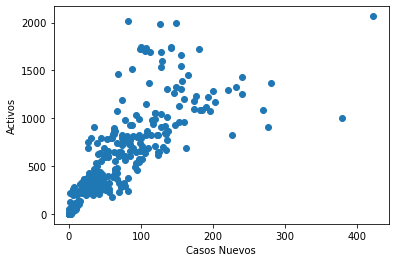

In [68]:
fig, ax = plt.subplots()
ax.scatter(numeralab['Casos Nuevos'], numeralab['Activos'])
ax.set_xlabel('Casos Nuevos')
ax.set_ylabel('Activos')
plt.show()

## Customizando los gráficos de dispersión

Podemos personalizar los gráficos de dispersión de manera similar a la personalización que introdujimos en otros gráficos.

Por ejemplo, si queremos mostrar dos comparaciones bivariadas, lado a lado, nos tenemos que asegurar que sean visualmente distintos.

A continuación, trazaremos dos diagramas de dispersión en los mismos ejes.

En uno, mostraremos los datos de junio del año pasado, y en el otro de julio del año pasado. Podemos seleccionar estas partes de los datos usando la indexación de series temporales, que vimos anteriormente.

Luego, agregamos cada uno de estos DataFrames en el objeto 'ax', por lo que:

- Primero agregamos los datos de junio del 2020, agregando personalización como el color de los puntos y etiquedando estos datos con 'label'.

- Luego, agregamos los otros datos de julio del 2020, y realizamos lo mismo, variando la personalización.

Llamamos al método de leyenda para saber qué DataFrame se identifica con qué color, y agregamos las etiquetas del eje X y del eje Y.

Finalmente, le pedimos a matplotlib que muestre el gráfico.

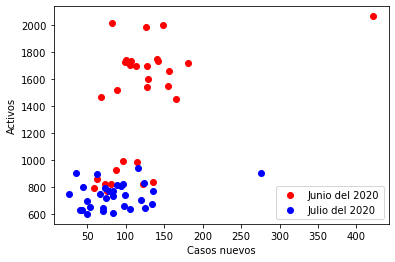

In [69]:
junio = numeralab["2020-06-01":"2020-06-30"]
julio = numeralab["2020-07-01":"2020-07-31"]
fig, ax = plt.subplots()
ax.scatter(junio['Casos Nuevos'], junio['Activos'], c='r', label='Junio del 2020')
ax.scatter(julio['Casos Nuevos'], julio['Activos'], c='b', label='Julio del 2020')
ax.legend()
ax.set_xlabel('Casos nuevos')
ax.set_ylabel('Activos')
plt.show()

In [70]:
## Codificando la comparación por color

Así es como se ve esta figura. Podemos ver que la relación entre casos nuevos y activos varió en junio y julio del año pasado, habiendo una disminución en julio respecto al mes de junio en los contagios.

El color, se puede usar como una comparación como hicimos aquí.

## Codificando una tercera variable por color

Pero también, podemos usar el color de los puntos para codificar una tercera variable, que proporcione información adicional sobre la comparación.

En los datos del índice, tenemos una variable continua que denota el tiempo almacenado.

Si ingresamos el índice como entrada al argumento de la palabra clave 'c', la variable se codificará como color.

Tengamos en cuenta que <b>este no es el argumento de palabra clave de color que usamos antes, sino que es solo la letra 'c'</b>.

Como antes, configuramos las etiquetas de los ejes y llamamos a 'plt.show()''.

SyntaxError: invalid syntax (<ipython-input-70-fea81390788f>, line 3)

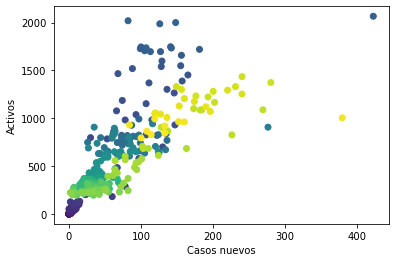

In [101]:
fig, ax = plt.subplots()
ax.scatter(numeralab['Casos Nuevos'], numeralab['Activos'], c=numeralab.index, label='Junio del 2020')
ax.set_xlabel('Casos nuevos')
ax.set_ylabel('Activos')
plt.show()

Ahora, el tiempo de las mediciones está codificando el brillo del color aplicado a los puntos, con puntos azul oscuro al principio y puntos posteriores en amarillo brillante.

## Ejercicios

En los ejercicios, practiquemos haciendo nuestros propios diagramas de dispersión.

### 22° EX: Creando gráficos de dispersión

Los 'scatterplots' son visualizaciones de dos variables (bivariables).

Repetiremos lo antes visto.

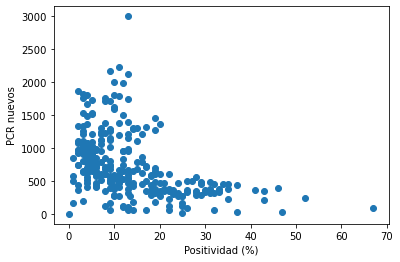

In [103]:
fig, ax = plt.subplots()

# Set data
ax.scatter(numeralab['Tasa de Positividad (%)'], numeralab['PCR Nuevos'])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('Positividad (%)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('PCR nuevos')

plt.show()

### 23° EX: Codificando por color

Las pantallas solo tienen dos dimensiones, pero podemos añadir otra dimensión en el gráfico de dispersión añadiendo color. Codificaremos el tiempo en forma de color.

Repetiremos lo antes visto.

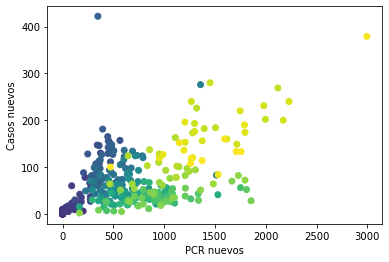

In [104]:
fig, ax = plt.subplots()

ax.scatter(numeralab['PCR Nuevos'], numeralab['Casos Nuevos'], c=numeralab.index)

ax.set_xlabel('PCR nuevos')
ax.set_ylabel('Casos nuevos')
plt.show()

## Preparando nuestras figuras para compartirlos con otros

Este capítulo se centrará en crear visualizaciones que podamos compartir con otras personas, además de crear código capaz de crear análisis de datos automatizados.

Comenzaremos con la personalización de los estilos de figuras.

Anteriormente, vimos que podemos cambiar la apariencia de elementos individuales de la figura, como el color de la línea o las formas de los marcadores.

## Cambiando el estilo de los gráficos

Ahora, cambiaremos el estilo general de la figura. Para ver lo que eso significa, veamos una de las figuras que creamos en las celdas anteriores.

Esta figura, mostraba los casos y recuperados nuevos por COVID-19, con la desviación estándar histórica, a lo largo de algunos meses del 2021, en Tarapacá, Chile.

Esto es lo que parece por defecto.

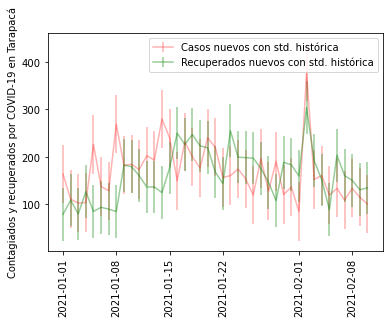

In [71]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(numeralab[numeralab.index >= '2021-01-01'].index, numeralab[numeralab.index >= '2021-01-01']['Casos Nuevos'], yerr=numeralab['Casos Nuevos'].std(), label = 'Casos nuevos con std. histórica', c='r', alpha = .3)

# Add Austin temperature data in each month with error bars
ax.errorbar(numeralab[numeralab.index >= '2021-01-01'].index, numeralab[numeralab.index >= '2021-01-01']['Recuperados Nuevos'], yerr=numeralab['Recuperados Nuevos'].std(), label = 'Recuperados nuevos con std. histórica', c='g', alpha = .4)

# Set the y-axis label
ax.set_ylabel('Contagiados y recuperados por COVID-19 en Tarapacá')
plt.xticks(rotation=90)
ax.legend()

plt.show()

## Choosing a style

Si en cambio, agregamos esta línea de código antes del código del trazado, el estilo de la figura se verá completamente diferente.

`plt.style.use('ggplot')`

El estilo que elegimos aquí, emula el estilo de la biblioteca de R, 'ggplot'.

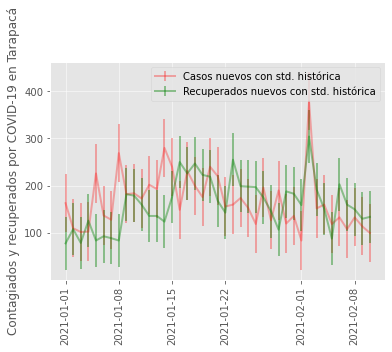

In [77]:
plt.style.use('ggplot')
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(numeralab[numeralab.index >= '2021-01-01'].index, numeralab[numeralab.index >= '2021-01-01']['Casos Nuevos'], yerr=numeralab['Casos Nuevos'].std(), label = 'Casos nuevos con std. histórica', c='r', alpha = .3)

# Add Austin temperature data in each month with error bars
ax.errorbar(numeralab[numeralab.index >= '2021-01-01'].index, numeralab[numeralab.index >= '2021-01-01']['Recuperados Nuevos'], yerr=numeralab['Recuperados Nuevos'].std(), label = 'Recuperados nuevos con std. histórica', c='g', alpha = .4)

# Set the y-axis label
ax.set_ylabel('Contagiados y recuperados por COVID-19 en Tarapacá')
plt.xticks(rotation=90)
ax.legend()

plt.show()

Notaremos que la configuración del estilo no cambió la apariencia de un solo elemento en la figura.

Más bien, cambió múltiples elementos: los colores son diferentes, las fuentes en los textos, y hay un fondo gris agregado que crea una cuadrícula blanca con una tonalidad débil, que marca las ubicaciones de las marcas de los ejes XY dentro del área del trazado.

Además, este estilo se aplicará a todas las figuras en la sesión de Jupyter, o al menos, hasta que lo cambiemos eligiendo otro estilo.

## Estilo predeterminado

Para volver al estilo predeterminado, debemos ejecutar:

`plt.style.use('default')`

## Otros estilos

Matplotlib ofrece distintas implementaciones de estilos, y podemos ver los diferentes estilos en la siguiente página web.

[En este enlace](https://matplotlib.org/gallery/style_sheets/style_sheets_reference).

## El estilo 'bmh'

Por ejemplo, ésto es lo que conseguiríamos si utilizáramos 'bmh' como estilo.

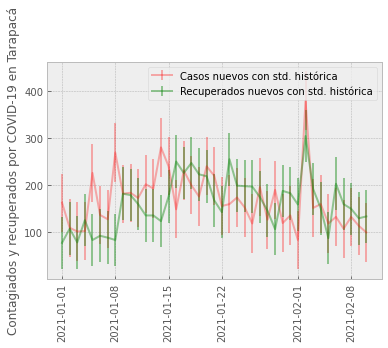

In [73]:
plt.style.use('bmh')
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(numeralab[numeralab.index >= '2021-01-01'].index, numeralab[numeralab.index >= '2021-01-01']['Casos Nuevos'], yerr=numeralab['Casos Nuevos'].std(), label = 'Casos nuevos con std. histórica', c='r', alpha = .3)

# Add Austin temperature data in each month with error bars
ax.errorbar(numeralab[numeralab.index >= '2021-01-01'].index, numeralab[numeralab.index >= '2021-01-01']['Recuperados Nuevos'], yerr=numeralab['Recuperados Nuevos'].std(), label = 'Recuperados nuevos con std. histórica', c='g', alpha = .4)

# Set the y-axis label
ax.set_ylabel('Contagiados y recuperados por COVID-19 en Tarapacá')
plt.xticks(rotation=90)
ax.legend()

plt.show()

## El estilo 'seaborn'

Ésto es lo que obtenemos si seleccionamos el estilo 'white' de seaborn (hay varios estilos en nombre de la biblioteca de software Seaborn).

Seaborn es una biblioteca de software para visualización estadística, que se basa en Matplotlib, y en Matplotlib adoptaron varios de los estilos desarrollados allí.

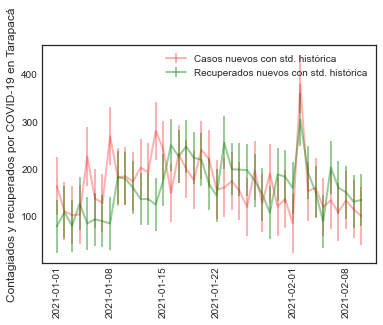

In [85]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(numeralab[numeralab.index >= '2021-01-01'].index, numeralab[numeralab.index >= '2021-01-01']['Casos Nuevos'], yerr=numeralab['Casos Nuevos'].std(), label = 'Casos nuevos con std. histórica', c='r', alpha = .3)

# Add Austin temperature data in each month with error bars
ax.errorbar(numeralab[numeralab.index >= '2021-01-01'].index, numeralab[numeralab.index >= '2021-01-01']['Recuperados Nuevos'], yerr=numeralab['Recuperados Nuevos'].std(), label = 'Recuperados nuevos con std. histórica', c='g', alpha = .4)

# Set the y-axis label
ax.set_ylabel('Contagiados y recuperados por COVID-19 en Tarapacá')
plt.xticks(rotation=90)
ax.legend()

plt.show()

## También podemos ver todos los estilos disponibles

In [84]:
# Veamos los estilos disponibles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## ¿Cómo elegiríamos qué estilo usar?

Si nuestro objetivo es, principalmente, comunicarnos con otros, pensemos en cómo podrían ver:

- Los fondos oscuros son, generalmente, desanimados, ya que son menos visibles, así que solo se deben usar si se tiene una buena razón.

- Si los colores son importantes, considereremos usar estilos amigables para daltónicos, como, por ejemplo, 'tableu-colorblind10'. Éste estilo se encuentra diseñado para retener las diferencias de color incluso cuando son vistos por personas daltónicas (puede parecer una consideración menor, pero aproximadamente, 1 de cada 20 personas son daltónicas).

- Las cifras diseñadas para su uso en sitios web tienen diferentes consideraciones que las cifras en informes impresos (por ejemplo, al imprimir, deseando ocupar menos tinta o ocupar escala de grises en caso de limitaciones de impresora).

## Ejercicios

En los ejercicios practicaremos algunos de estos estilos.

### 24° EX: Probando otros estilos

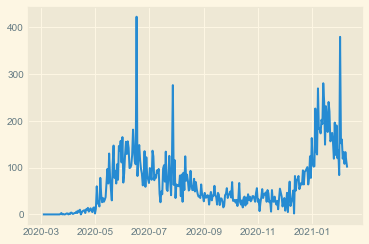

In [87]:
# Use the "Solarize_Light2" style and create new Figure/Axes
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
ax.plot(numeralab.index, numeralab["Casos Nuevos"])
plt.show()

## Compartiendo visualizaciones con otro

Una vez hayamos creado nuestras visualizaciones, estaremos listos para compartirlos con nuestros colaboradores, colegas y otros.

Aquí, mostraremos cómo haríamos para hacer las personalizaciones finales a las figuras y guardarlas en un formato apropiado.

## Una figura para compartir

Tomemos, por ejemplo, algún grafico con el que hayamos trabajado anteriormente.

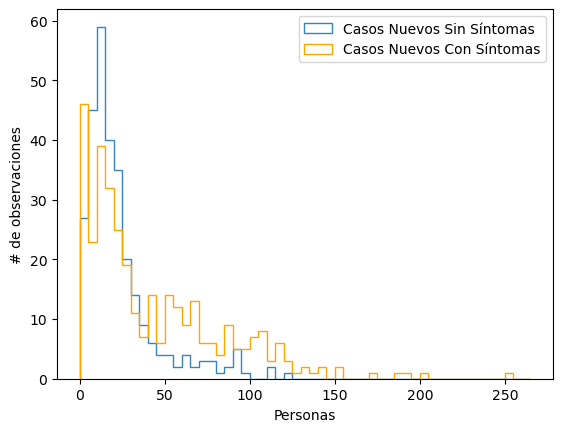

In [90]:
plt.style.use('default')
fig, ax = plt.subplots()

# Definimos los histogramas con bins
ax.hist(numeralab['Casos Nuevos Sin Síntomas'], label='Casos Nuevos Sin Síntomas', alpha = 0.9, bins=np.arange(0, 270, 5), histtype='step')
ax.hist(numeralab['Casos Nuevos Con Síntomas'], label = 'Casos Nuevos Con Síntomas', color = 'orange', bins=np.arange(0, 270, 5), histtype='step')

# Customizamos y mostramos el gráfico
ax.set_xlabel("Personas")
ax.set_ylabel("# de observaciones")
ax.legend()
plt.show()

Cuando ejecutamos este código anteriormente, mostrábamos la figura en la pantalla cuando llamábamos la método:

`plt.show()`

## Guardando la figura en un archivo

Ahora, reemplazaremos la llamada a dicho método con una llamada al método:

`fig.savefig()`

Que es del objeto figura. En el argumento, debemos proporcionar un nombre de archivo.

Al realizar lo anterior, la figura ya no aparecerá en nuestra pantalla, sino que será guardada como una imagen con el nombre que le proporcionamos de entrada a la función.

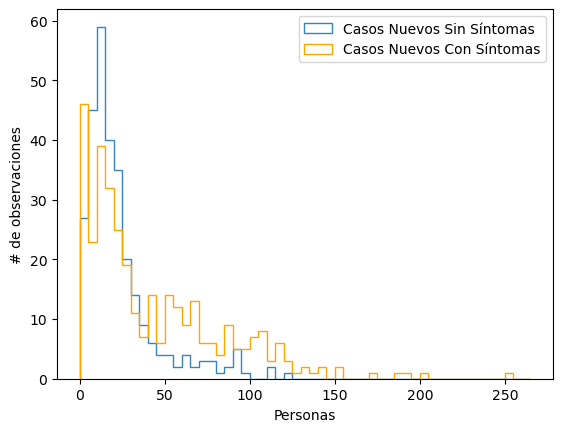

In [91]:
plt.style.use('default')
fig, ax = plt.subplots()

# Definimos los histogramas con bins
ax.hist(numeralab['Casos Nuevos Sin Síntomas'], label='Casos Nuevos Sin Síntomas', alpha = 0.9, bins=np.arange(0, 270, 5), histtype='step')
ax.hist(numeralab['Casos Nuevos Con Síntomas'], label = 'Casos Nuevos Con Síntomas', color = 'orange', bins=np.arange(0, 270, 5), histtype='step')

# Customizamos y mostramos el gráfico
ax.set_xlabel("Personas")
ax.set_ylabel("# de observaciones")
ax.legend()
fig.savefig('casosnuevos_sinyconsintomas.png')

Así queda la imagen que creamos.

<img src="casosnuevos_sinyconsintomas.png"></img>

En la celda interactiva de Python que estemos usando, podremos llamar a la función:

`ls`

La cual nos brindará una lista de archivos en el directorio de trabajo actual.

En este caso:

In [92]:
ls

 El volumen de la unidad D es HDD
 El n�mero de serie del volumen es: 80F8-51EE

 Directorio de d:\Universidad\DataCamp\Python\Introduction_to_data_visualization_with_matplotlib

04-03-2021  19:26    <DIR>          .
04-03-2021  19:26    <DIR>          ..
10-02-2021  16:09    <DIR>          .vscode
10-02-2021  16:03            25.085 1.jpg
10-02-2021  14:43            61.119 bbddnumeralab-covid19.csv
04-03-2021  19:26            22.729 casosnuevos_sinyconsintomas.png
03-03-2021  14:08         5.396.762 notebook.ipynb
               4 archivos      5.505.695 bytes
               3 dirs  500.708.286.464 bytes libres


Ahora podremos compartir este archivo que contiene la visualización con otros.

## Formatos de archivo distintos

En la celda anterior, guardamos la figura como un archivo PNG. Este formato de archivo proporciona una comprensión sin pérdidas en su imagen:

- Esto significa que la imagen retendrá una alta calidad, pero también ocupará cantidades relativamente grandes de espacio en el disco duro.

En este sentido, se pueden seleccionar otros formatos de archivo según las necesidades.

Por ejemplo, si la imagen será parte de un sitio web, es posible que deseemos utilizar el formato JPG en su lugar.

Este formato usa comprensión con pérdida, y puede usarse para crear figuras que ocupen menos espacio en disco y menos ancho de banda.

In [96]:
fig.savefig('casosnuevos_sinyconsintomas.jpg')

Así queda la imagen que creamos.

<img src="casosnuevos_sinyconsintomas.jpg"></img>

Podemos controlar qué tan pequeño será el archivo resultante y perdiendo cierta calidad,estableciendo con el argumento 'quality' la calidad del 1 al 100, evitando valores por encima del 95, porque en ese punto la comprensión ya no es efectiva.

In [97]:
fig.savefig('casosnuevos_sinyconsintomas20.jpg', quality=20)

ipykernel_launcher:1: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.


Así queda la imagen que creamos con menos resolución.

<img src="casosnuevos_sinyconsintomas20.jpg"></img>

Si elegimos el formato de archivo SVG, producirá un archivo de gráficos vectoriales, donde diferentes elementos pueden ser editados en detalle por softwares de gráficos avanzados, como Gimp o Adobe Illustrator.

Si necesitamos editar la figura después de producirla, esta podría ser una buena opción.

In [95]:
fig.savefig('casosnuevos_sinyconsintomas.svg')

Así queda la imagen que creamos.

<img src="casosnuevos_sinyconsintomas.svg"></img>

## Resolución

Otra palabra clave que podemos usar para controlar la calidad de las imágenes que producimos, es con el argumento de palabra clave 'dpi'. Ésto significa puntos por pulgada, o 'dot per inch'. Cuanto mayor sea este número, más densamente se representará la imagen.

Si establecemos, por ejemplo, el número en 300, esto generará una calidad de imagen de alta calidad.

Por supuesto, cuanto mayor sea la resolución que solicitemos, mayor será el tamaño del archivo.

In [ ]:
fig.savefig('casosnuevos_sinyconsintomas300dpi.png', dpi = 300)

Así queda la imagen que creamos.

<img src="casosnuevos_sinyconsintomas300dpi.png"></img>

## Tamaño de la figura

Finalmente, otra cosa que es posible que deseemos controlar es el tamaño de la figura. Para controlar esto, el objeto figura también tiene una función llamada:

`fig.set_size_inces([n, m])`

Esta función toma una secuencia de números:

- El número n establece el ancho de la figura.

- El número m establece la altura de la figura.

Por lo tanto, establecer el tamaño también determinará la relación de aspecto de la figura. Por ejemplo, podemos configurar que nuestra figura sea ancha y corta como en la siguiente celda.

In [104]:
fig.set_size_inches([5, 3])
fig.savefig('casosnuevos_sinyconsintomas5x3.png', dpi = 300, quality=80)

ipykernel_launcher:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


Resultando en:

<img src="casosnuevos_sinyconsintomas5x3.png"></img>

## Otro ratio de aspecto

O largo y angosto, como aquí.

In [102]:
fig.set_size_inches([3, 5])
fig.savefig('casosnuevos_sinyconsintomas3x5.png', dpi = 300, quality=80)

ipykernel_launcher:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


Resultando:

<img src="casosnuevos_sinyconsintomas3x5.png"></img>

## Ejercicios

En los ejercicios, practicaremos el guardar las visualizaciones como archivos.

### 25° EX: Guardando archivos

In [108]:
fig.set_size_inches([3, 5])
fig.savefig('casosnuevos_sinyconsintomas3x5.png', dpi = 300, quality=80)

ipykernel_launcher:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


In [109]:
### 26° EX: Guardando archivos con diferentes tamaños

In [115]:
# Set figure dimensions and save as a PNG
fig.set_size_inches([3, 5])
fig.savefig('figure_3_5.png')

# Set figure dimensions and save as a PNG
fig.set_size_inches([5, 3])
fig.savefig('figure_5_3.png')